In [1]:
## Import Simulation Function Library
import sys
path = 'C:/Users/fritz/Google Drive/Graduate School/Research/Data Analysis/Code'
sys.path.append(path) 
from RetinaOptLib import *


In [2]:
## For saving/loading Data
simData = load_data("sim_optimal_data_19-08-29_13-42.dat")
ssData  = load_data("stim_sweep_data_19-08-29_13-35.dat")
imgData = load_data('img_data_19-08-29_13-56.dat')

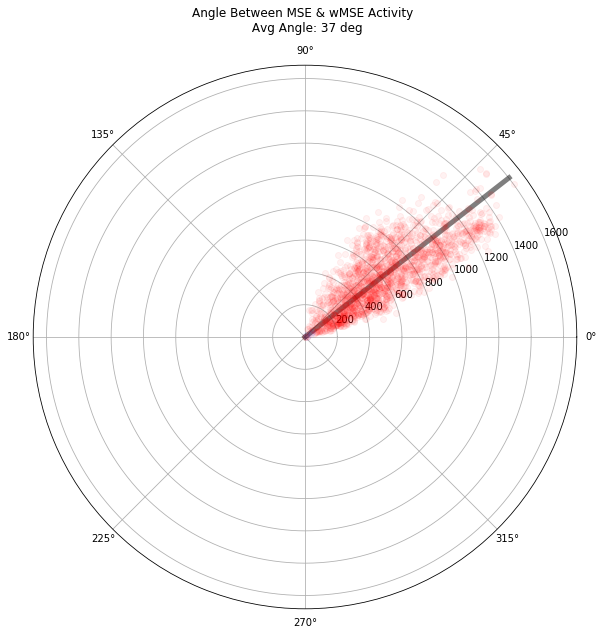

<Figure size 432x288 with 0 Axes>

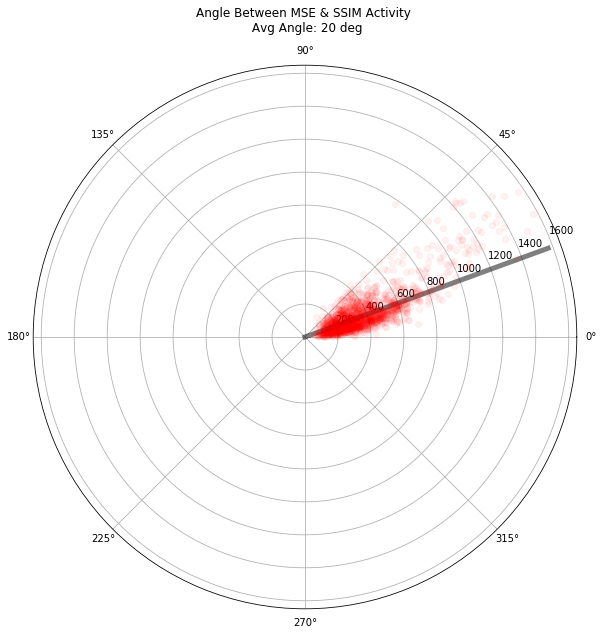

<Figure size 432x288 with 0 Axes>

In [3]:
#radial plot of image reconstructions 
a = .05
plt.figure(figsize=(10,10))
actAnglePlot(simData.mseActs,simData.wmsActs,'wMSE',a=a)
plt.savefig('mseVSwmsAng.jpg',bbox_inches='tight')

plt.figure(figsize=(10,10))
actAnglePlot(simData.mseActs,simData.ssmActs,'SSIM',a=a)
plt.savefig('mseVSssmAng.jpg',bbox_inches='tight')

In [3]:
## load Dictionary Data stored in 'dict.mat'
# dict.mat is piece 2015-11-09-03,  Stixel 8, Eccentricity 20 deg


In [3]:
# load & Preprocess Image
img = loadRawImg("pic.jpg")
ret_data = load_raw_data('dict.mat')

## Run Simulation
runSimulation = False
runConvSim    = False
### Simulation Parameters
pixelDims = (20,20)  # Pixel Dimensions of Retinal STA 
numStims  = -1    # Number of Allowable stimulations
electrode = False  # Solve for Electrode-Dictionary Reconstruction or Optimal Cellular Activity
maxAct  = 100     # Maximum cell activity for time window

### Psychophysical Parameters
smps = 5.5              # Stimulus Monitor Pixel Size in micrometers
stixelSize = 8          # Stixel Size (number of monitor pixels per stimulus pixel)
eccentricity = 20       # Eccentricity from Fovea of Tissue Center
eyeDiam = 24            # Diameter of Eye in milimeters
objVisAng = (120,100)   # Size of VIsualField of View (degrees)
L  = 350                # L Luminance (cd/m2) of object
k = 3                   # Psychometric constant (minimum detection signal to noise ratio)
T = 100                 # Integration time of the eye (in msec)
Ng0 = 36000             # RGC Density at fovea (cells/deg^2)
eg  = 3                 # Subject-dependent  Cell Density Constant (deg)
# compute the  visual angle spanned by the electrode array 
elecVisAng = getElecAngs(smps,stixelSize, eyeDiam,pixelDims) 

# pupil diameter (mm)
# for now calculate as function of luminance, in future can be measured directly via eye tracking
pupilDiam  = 5 - 3 * np.tanh( .4*np.log(L*objVisAng[0]*objVisAng[1]/1600))
                             
psychParams = { # psychophysical parameters dictionary
    "L" : L,
    "XO": objVisAng[0], 
    "YO": objVisAng[1],
    "d" : pupilDiam,
    "e" : eccentricity,
    "elecXO" : elecVisAng[0],
    "elecYO" : elecVisAng[1],
    "binocular" : True,
    "k" : k,
    "T" : T/1000,
    "Ng0": Ng0,
    "eg" : eg,
}

simParams = { # Stimulation Parameters Object
    "A" : ret_data.A,
    "P" : ret_data.P,
    "eMap" : ret_data.e_map,
    "eLocs" : ret_data.e_locs,
    "numCells" : ret_data.A.shape[1],
    "numPixels" : ret_data.num_pixels,  
    "pixelDims" : pixelDims,
    "numStims"  : numStims,
    "maxAct"  : maxAct
}
sDims = getSelectionDims(psychParams,img)

print('%i x %i degrees of visual angle is %i x %i pixels of the original image.'%(elecVisAng[0],elecVisAng[1],sDims[0],sDims[1]))

# Run the Simulation 
if runSimulation:
    imgData = preProcessImage(img, psychParams, simParams)
    (
      mseImgs, wmsImgs, ssmImgs,
      mseActs, wmsActs, ssmActs,
      mseRecons, wmsRecons, ssmRecons
    )  =  metricCompar(imgData,simParams,psychParams, electrode)
    
if runConvSim:
    imgData = preProcessImage(img,psychParams,simParams)
#     imgData.imgSet = imgData.imgSet[:,1:3]
#     imgData.xs = imgData.xs[1:3]
#     imgData.ys = imgData.ys[1:3]
#     imgData.numImgs  = 2
    stimSweepData = numStimSweep(imgData,simParams,psychParams,electrode)
        
        

2 x 2 degrees of visual angle is 34 x 34 pixels of the original image.


In [6]:
# 1) How does the choice of error metric change optimal cellular activity during linear reconstruction?
    
#     a) Single Image Analysis:
#         - Reconstructed Image Comparison: Is there a perceivable difference in reconstructed Image?
#         - Activity: 
#             i) Is there a difference in which cells are selected in terms of angle?
#             ii) What are the total number of spikes required by each algo


#     b) Multi-Image Analysis:
#         - Activit|y:
#             i) Display the optimal activity angle relative to MSE for wMSE and SSIM reconstructions
#             ii) Histogram of total number of spikes required over all images for each metric


# 2) Distortion: How do the activities change when total spikes are limited? 

#         a) Error Metric Analysis: For each metric, plot the error of each reconstruction versus num of allowed spikes averaged over all images
#             i) Where do the metric diverge? What do the reconstructions look like? 


#         b) Activity Analysis:  How different is distored activity from optimal in terms of angle betweee, n vectors? 
#             i) Over each image reconstruction, calculate the anlge between distorted image activity and optimal activity
#             ii) average over all images
#             iii) plot numStims vs angle for each metric. Does one metric converge to optimal activity faster? 


# 3) Separability: Given a set of cell activities can we separate them into clusters that predict the error metric used?
       
#        a) For each metric, stack the cell activity vectors for thatac metrics into the same matrix and perform pca
       
#        b) Plot each data point/image with color specifying metric (maybe compare to random). See if linearly separable. 



<IPython.core.display.Javascript object>


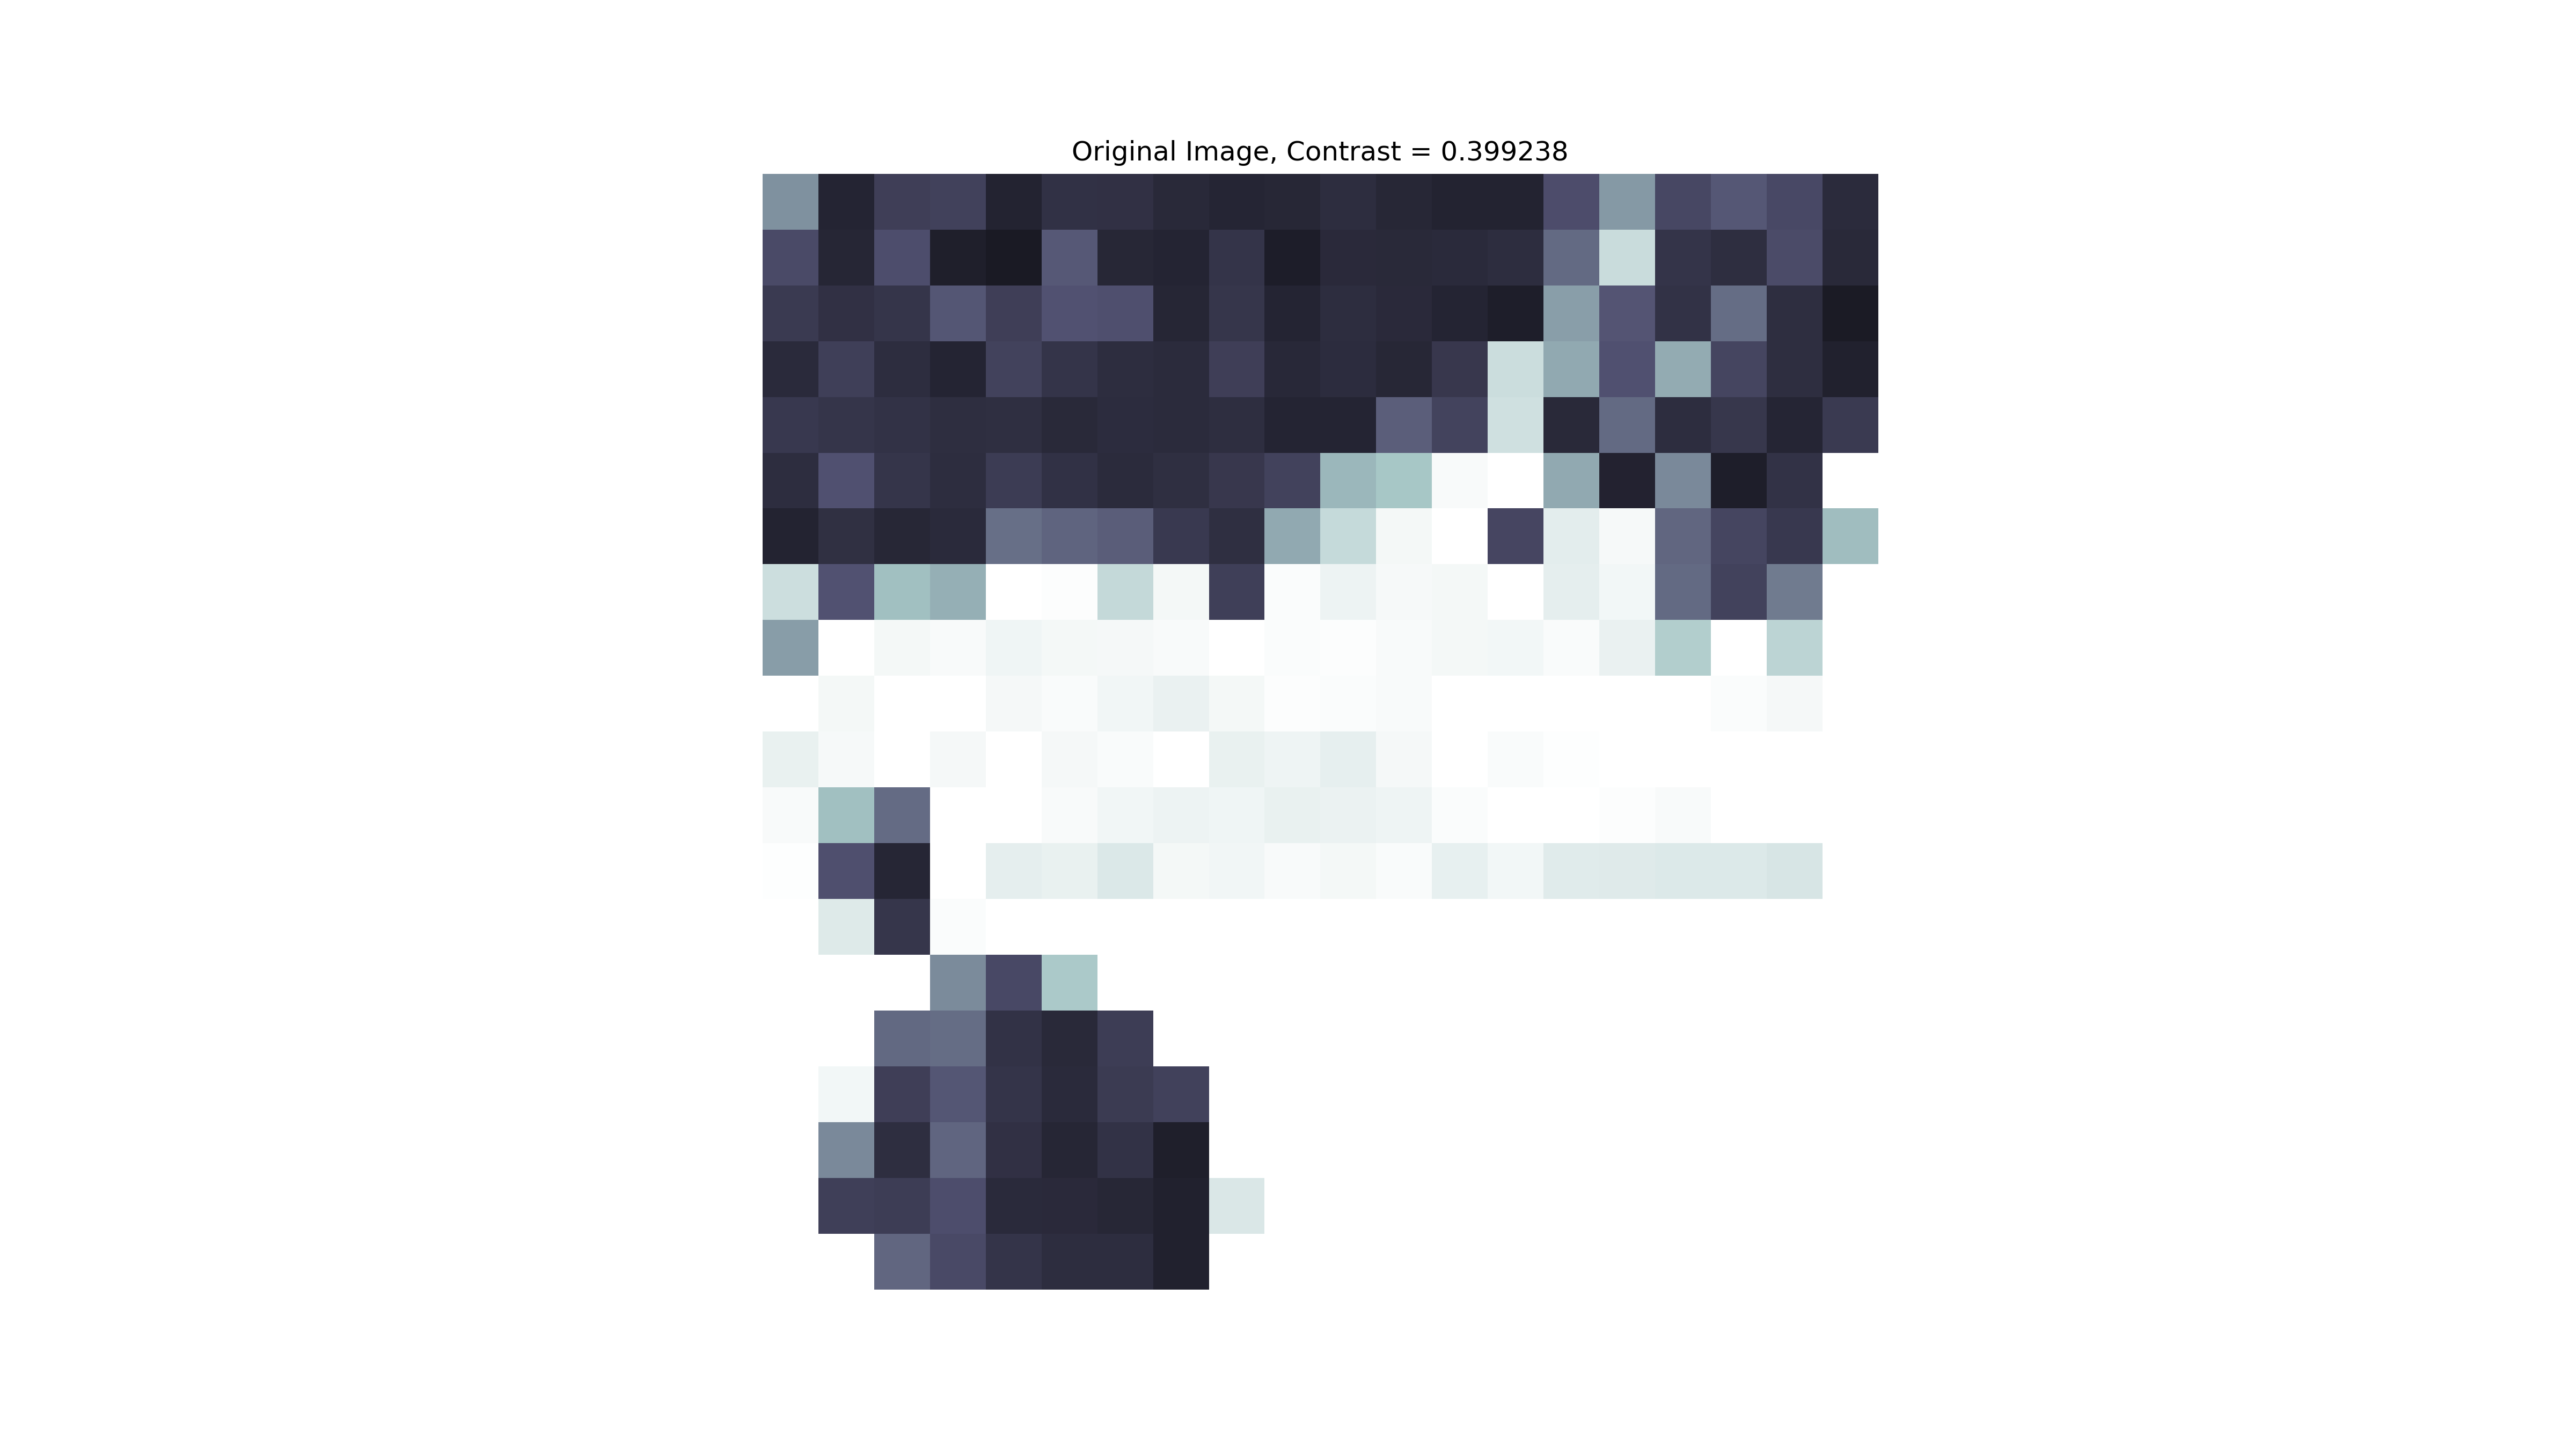

<IPython.core.display.Javascript object>


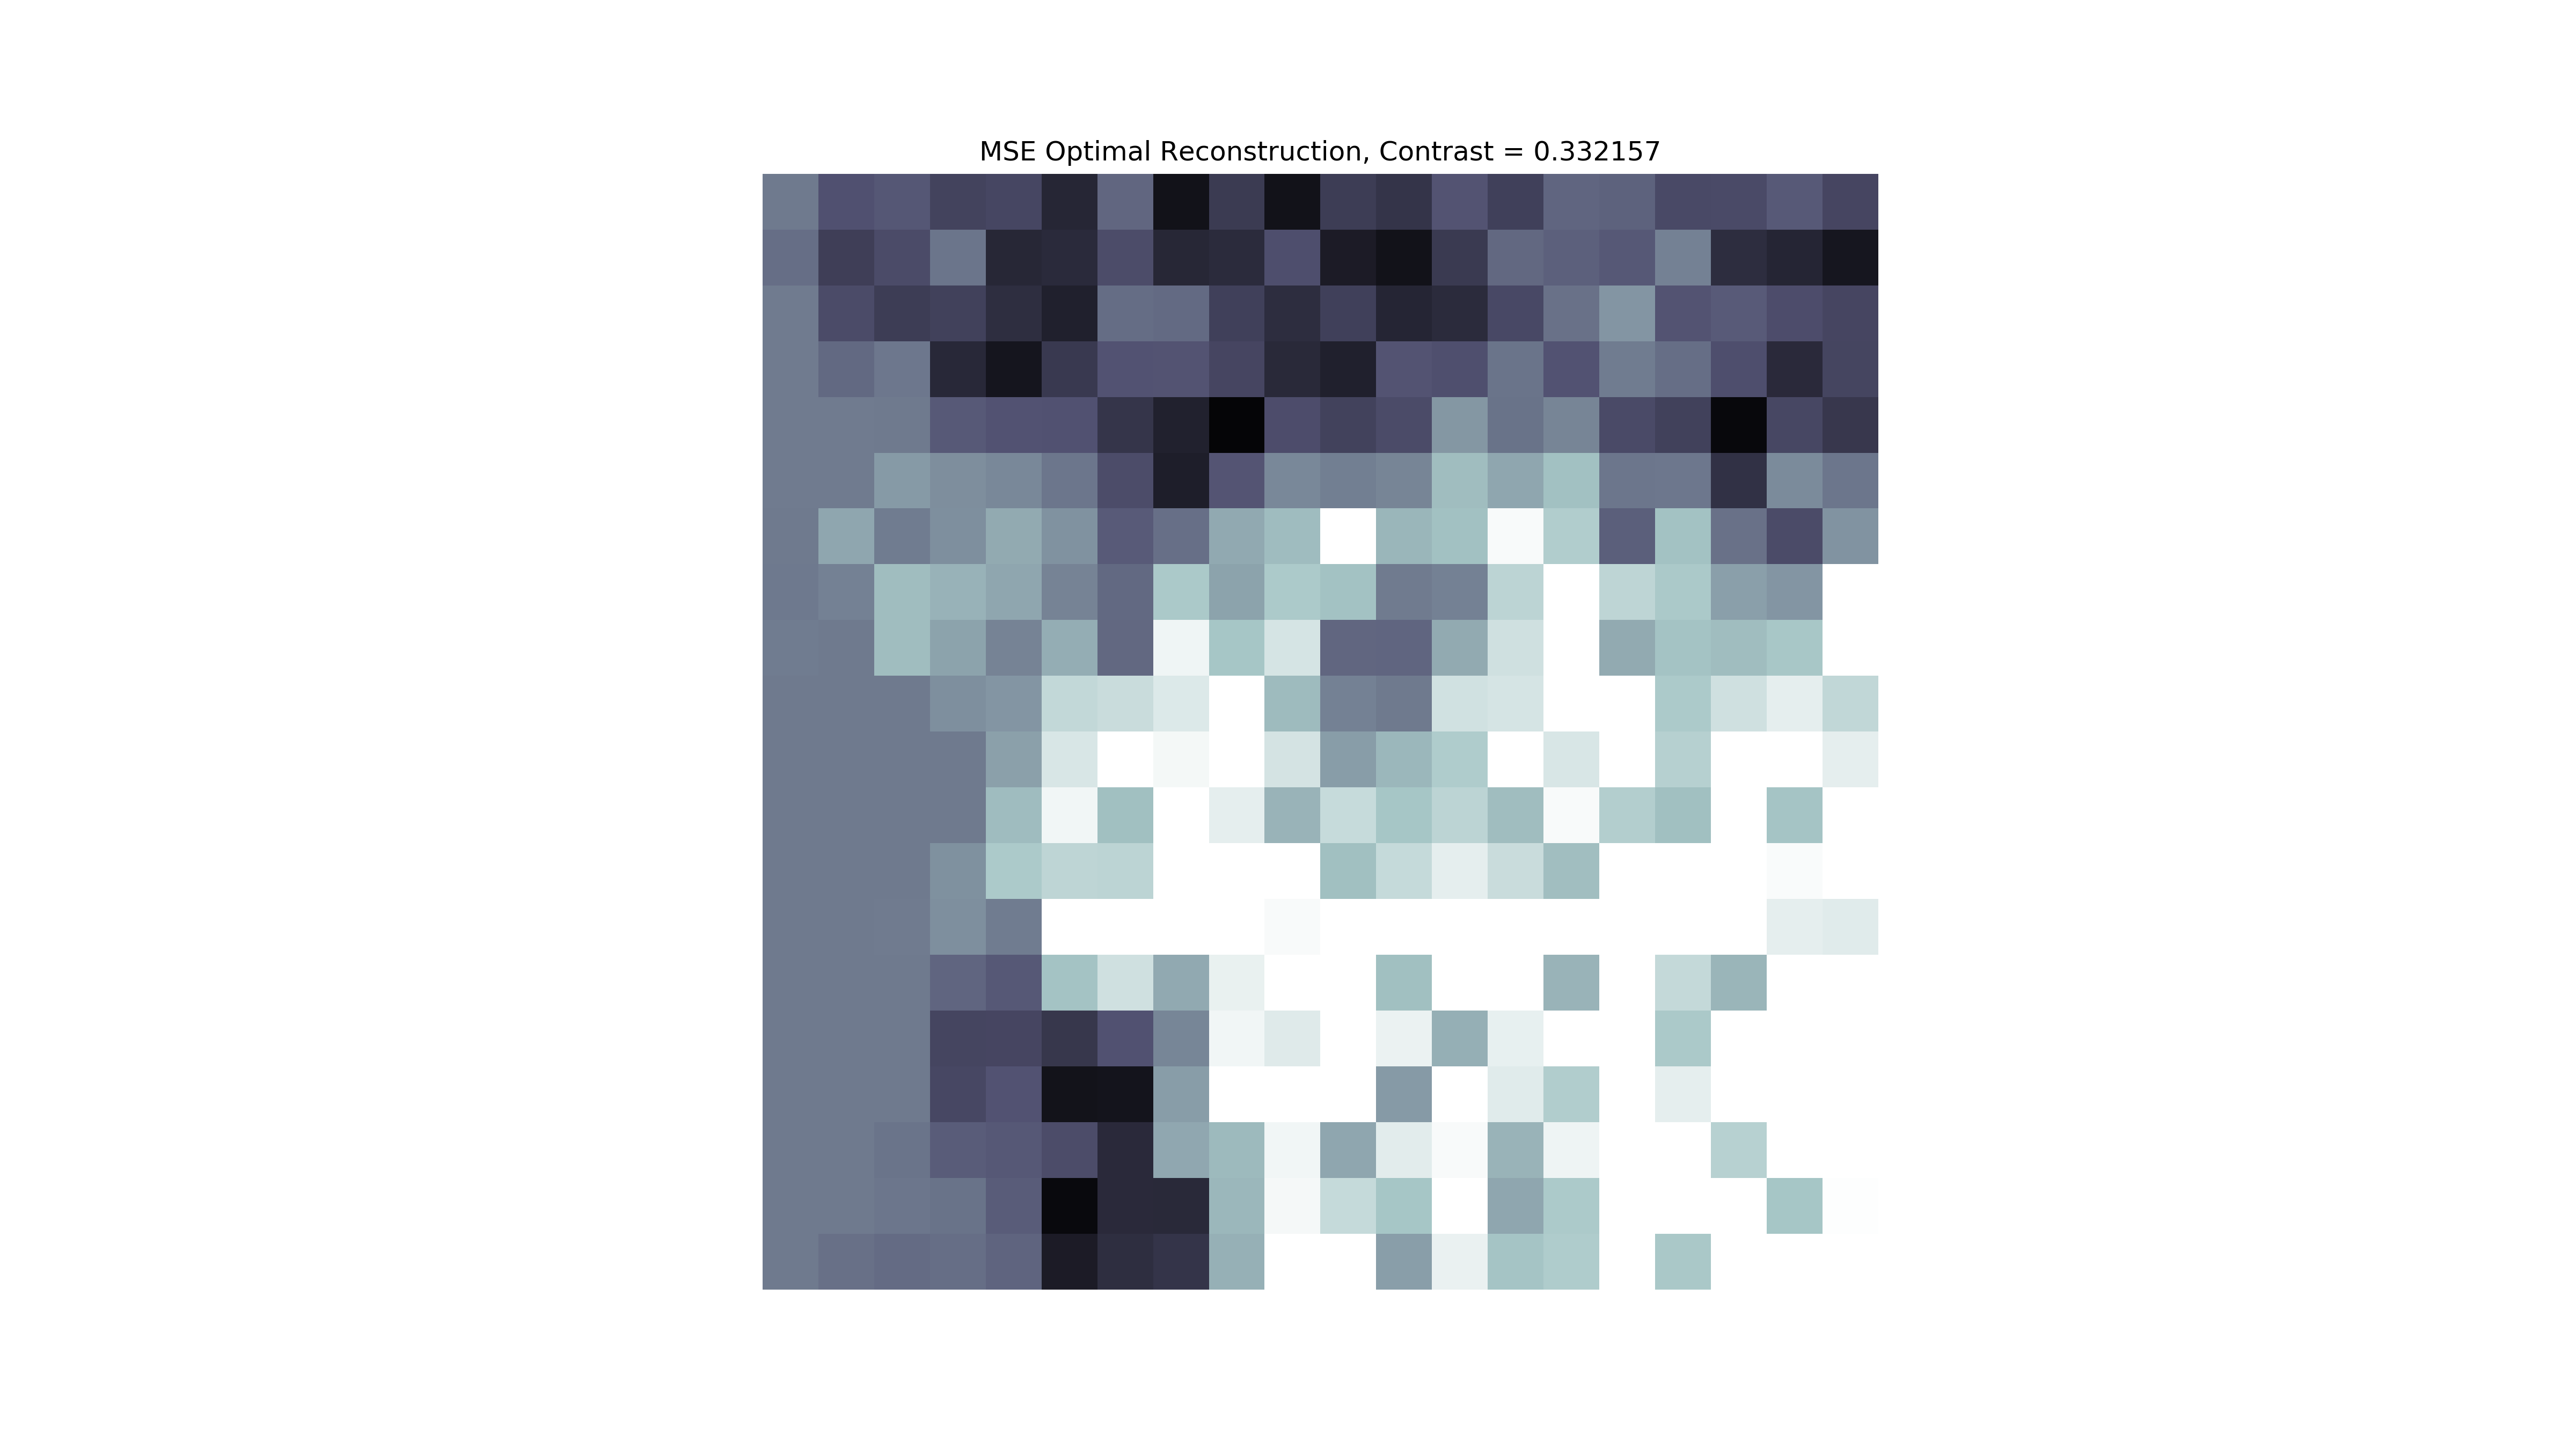

<IPython.core.display.Javascript object>


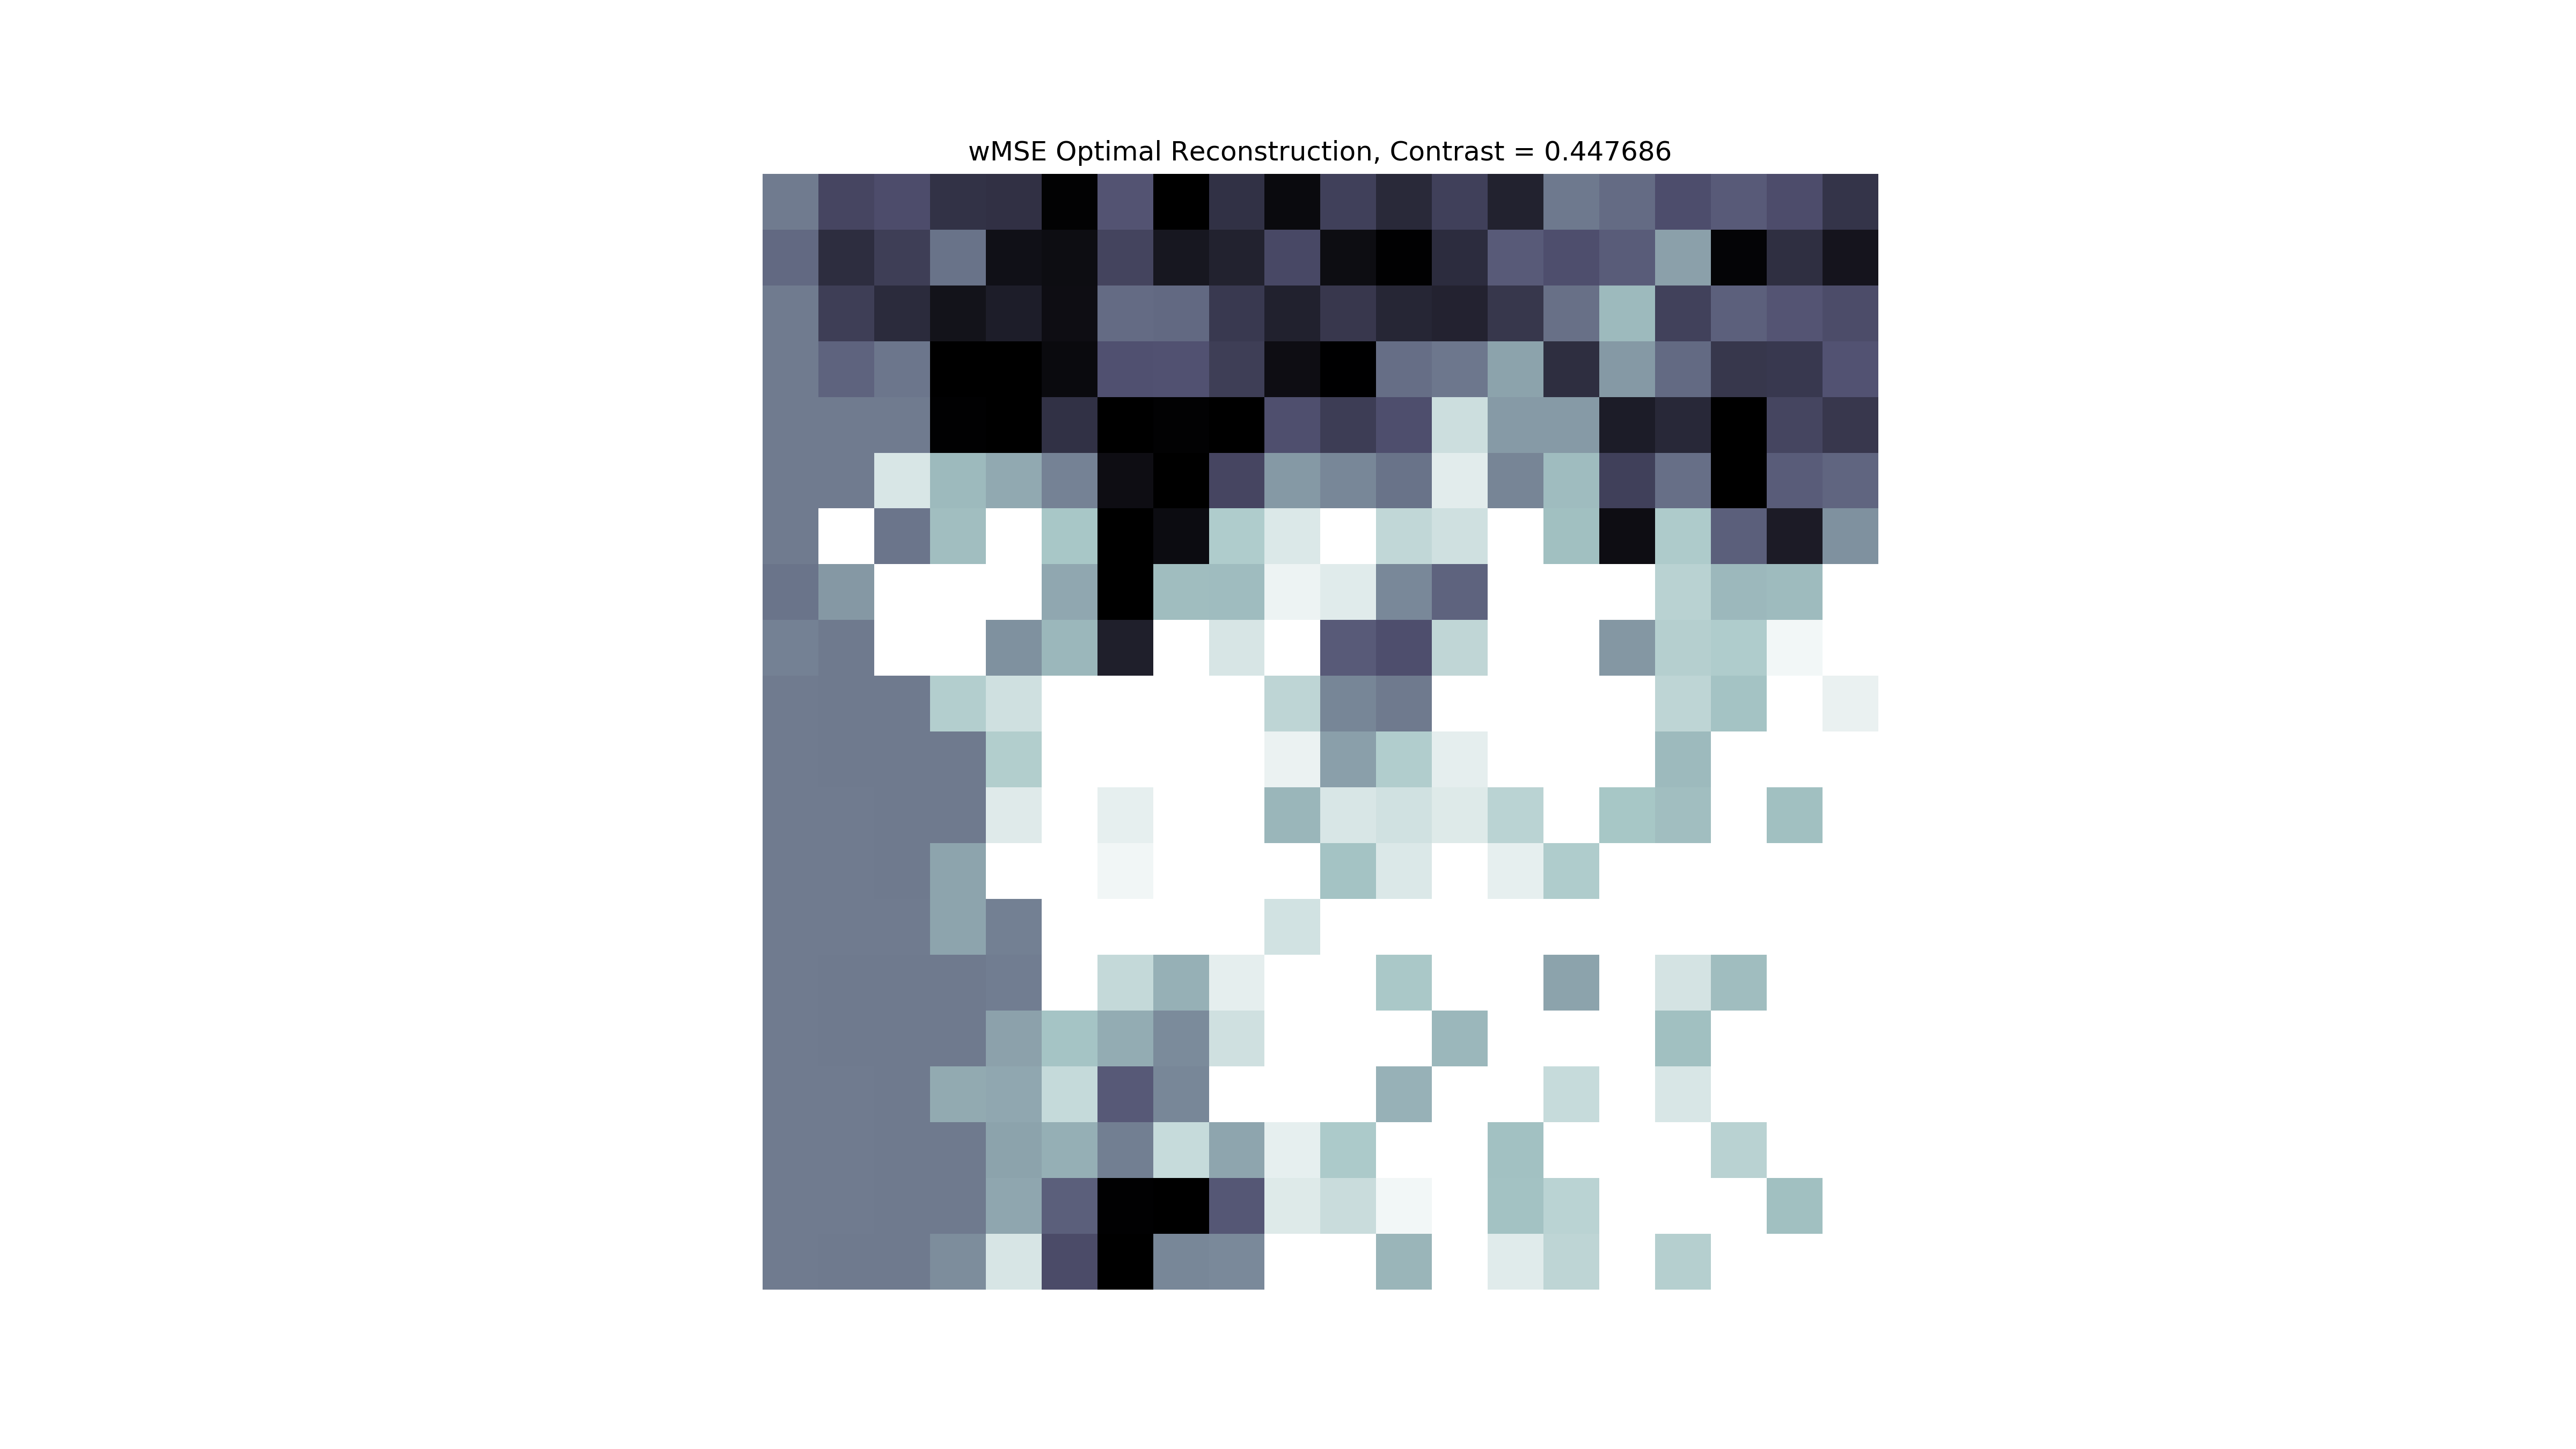

<IPython.core.display.Javascript object>


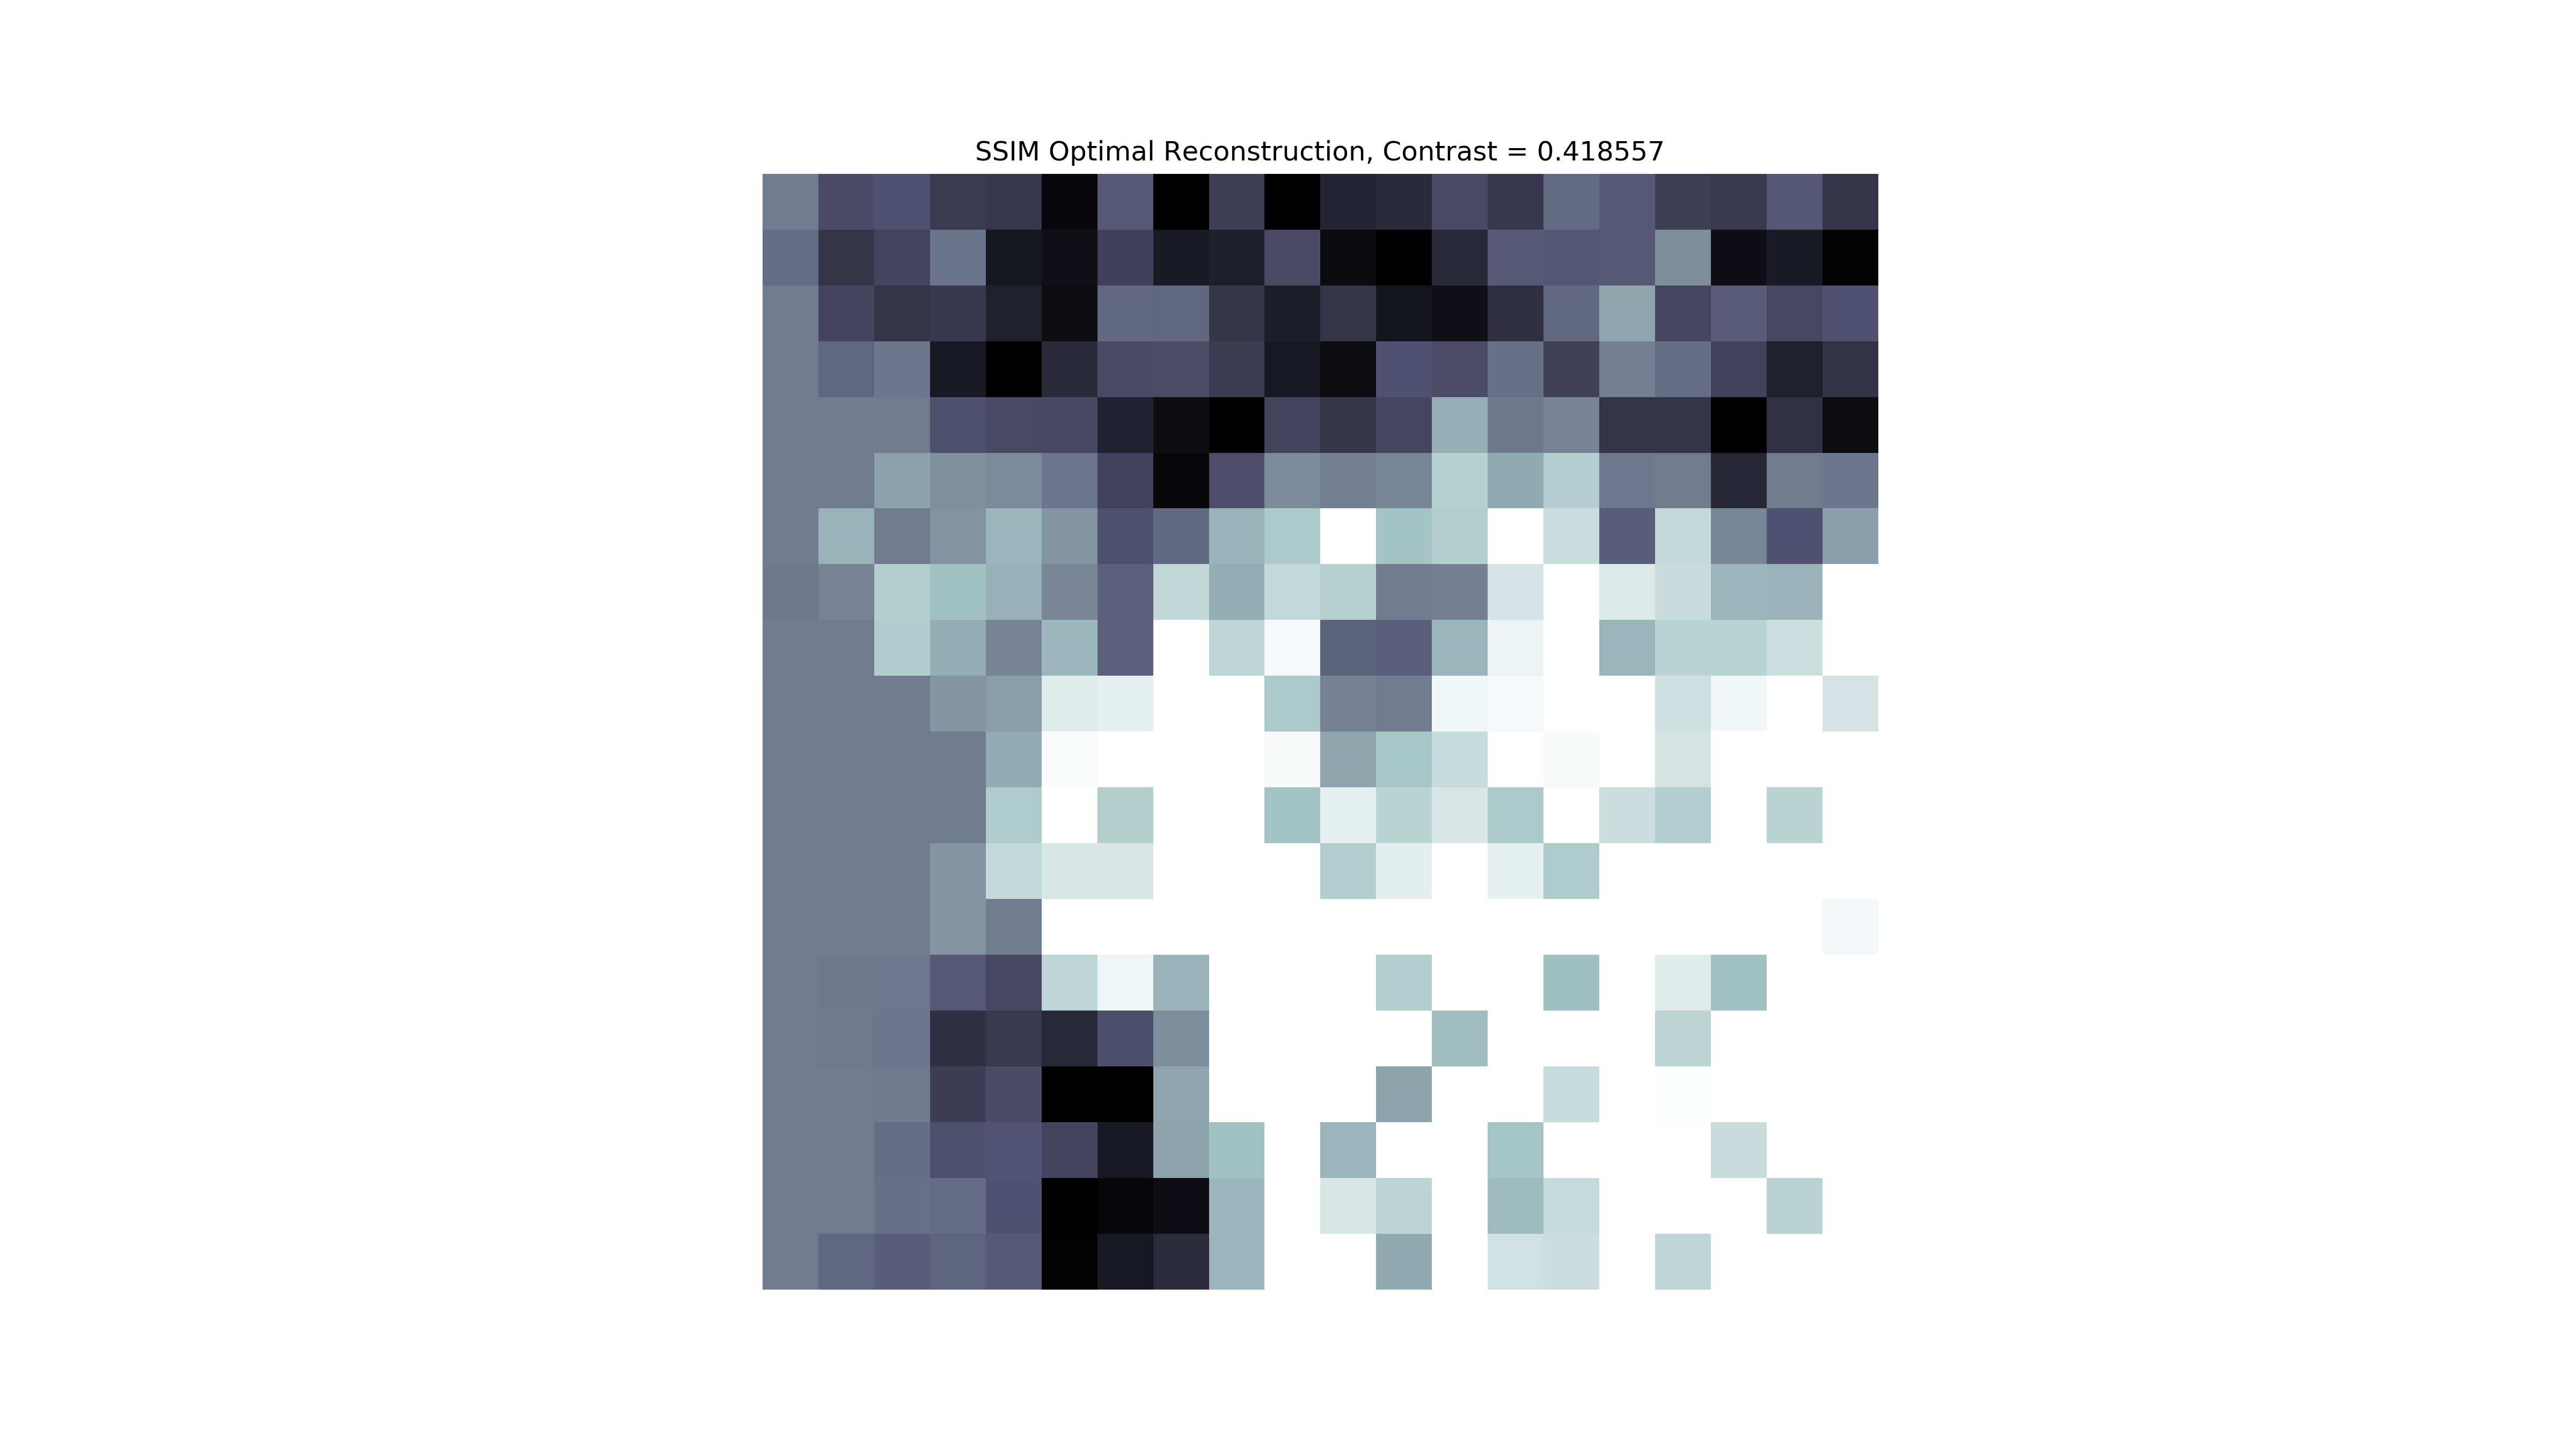

In [15]:
## single image comparison
%matplotlib notebook
plt.rcParams["figure.figsize"] = [16,9]
Tidx = 15
imgNum = 980
cmode = 'RMS' #use RMS (standard deviation) contrast for comparison
pixelDims
origIm = np.reshape(imgData.imgSet[:,imgNum],pixelDims,order='F')
mseRec = np.reshape(simData.mseImgs[:,imgNum],pixelDims,order='F')
wmsRec = np.reshape(simData.wmsImgs[:,imgNum],pixelDims,order='F')
ssmRec = np.reshape(simData.ssmImgs[:,imgNum],pixelDims,order='F')

plt.figure()
plt.imshow(origIm,cmap='bone',vmax=.5,vmin=-.5)
plt.axis('off')
plt.title("Original Image, Contrast = %f"%contrast(origIm,cmode))
plt.savefig('Original.jpg',bbox_inches='tight')
plt.show()

plt.figure()
plt.imshow(mseRec,cmap='bone',vmax=.5,vmin=-.5)
plt.axis('off')
plt.title("MSE Optimal Reconstruction, Contrast = %f"%contrast(mseRec,cmode))
plt.savefig('MSERecons.jpg',bbox_inches='tight')


plt.figure()
plt.imshow(wmsRec,cmap='bone',vmax=.5,vmin=-.5)
plt.axis('off')
plt.title("wMSE Optimal Reconstruction, Contrast = %f"%contrast(wmsRec,cmode))
plt.savefig('wMSRecons.jpg',bbox_inches='tight')


plt.figure()
plt.imshow(ssmRec,cmap='bone',vmax=.5,vmin=-.5)
plt.axis('off')
plt.title("SSIM Optimal Reconstruction, Contrast = %f"%contrast(ssmRec,cmode))
plt.savefig('SSMRecons.jpg',bbox_inches='tight')



<IPython.core.display.Javascript object>


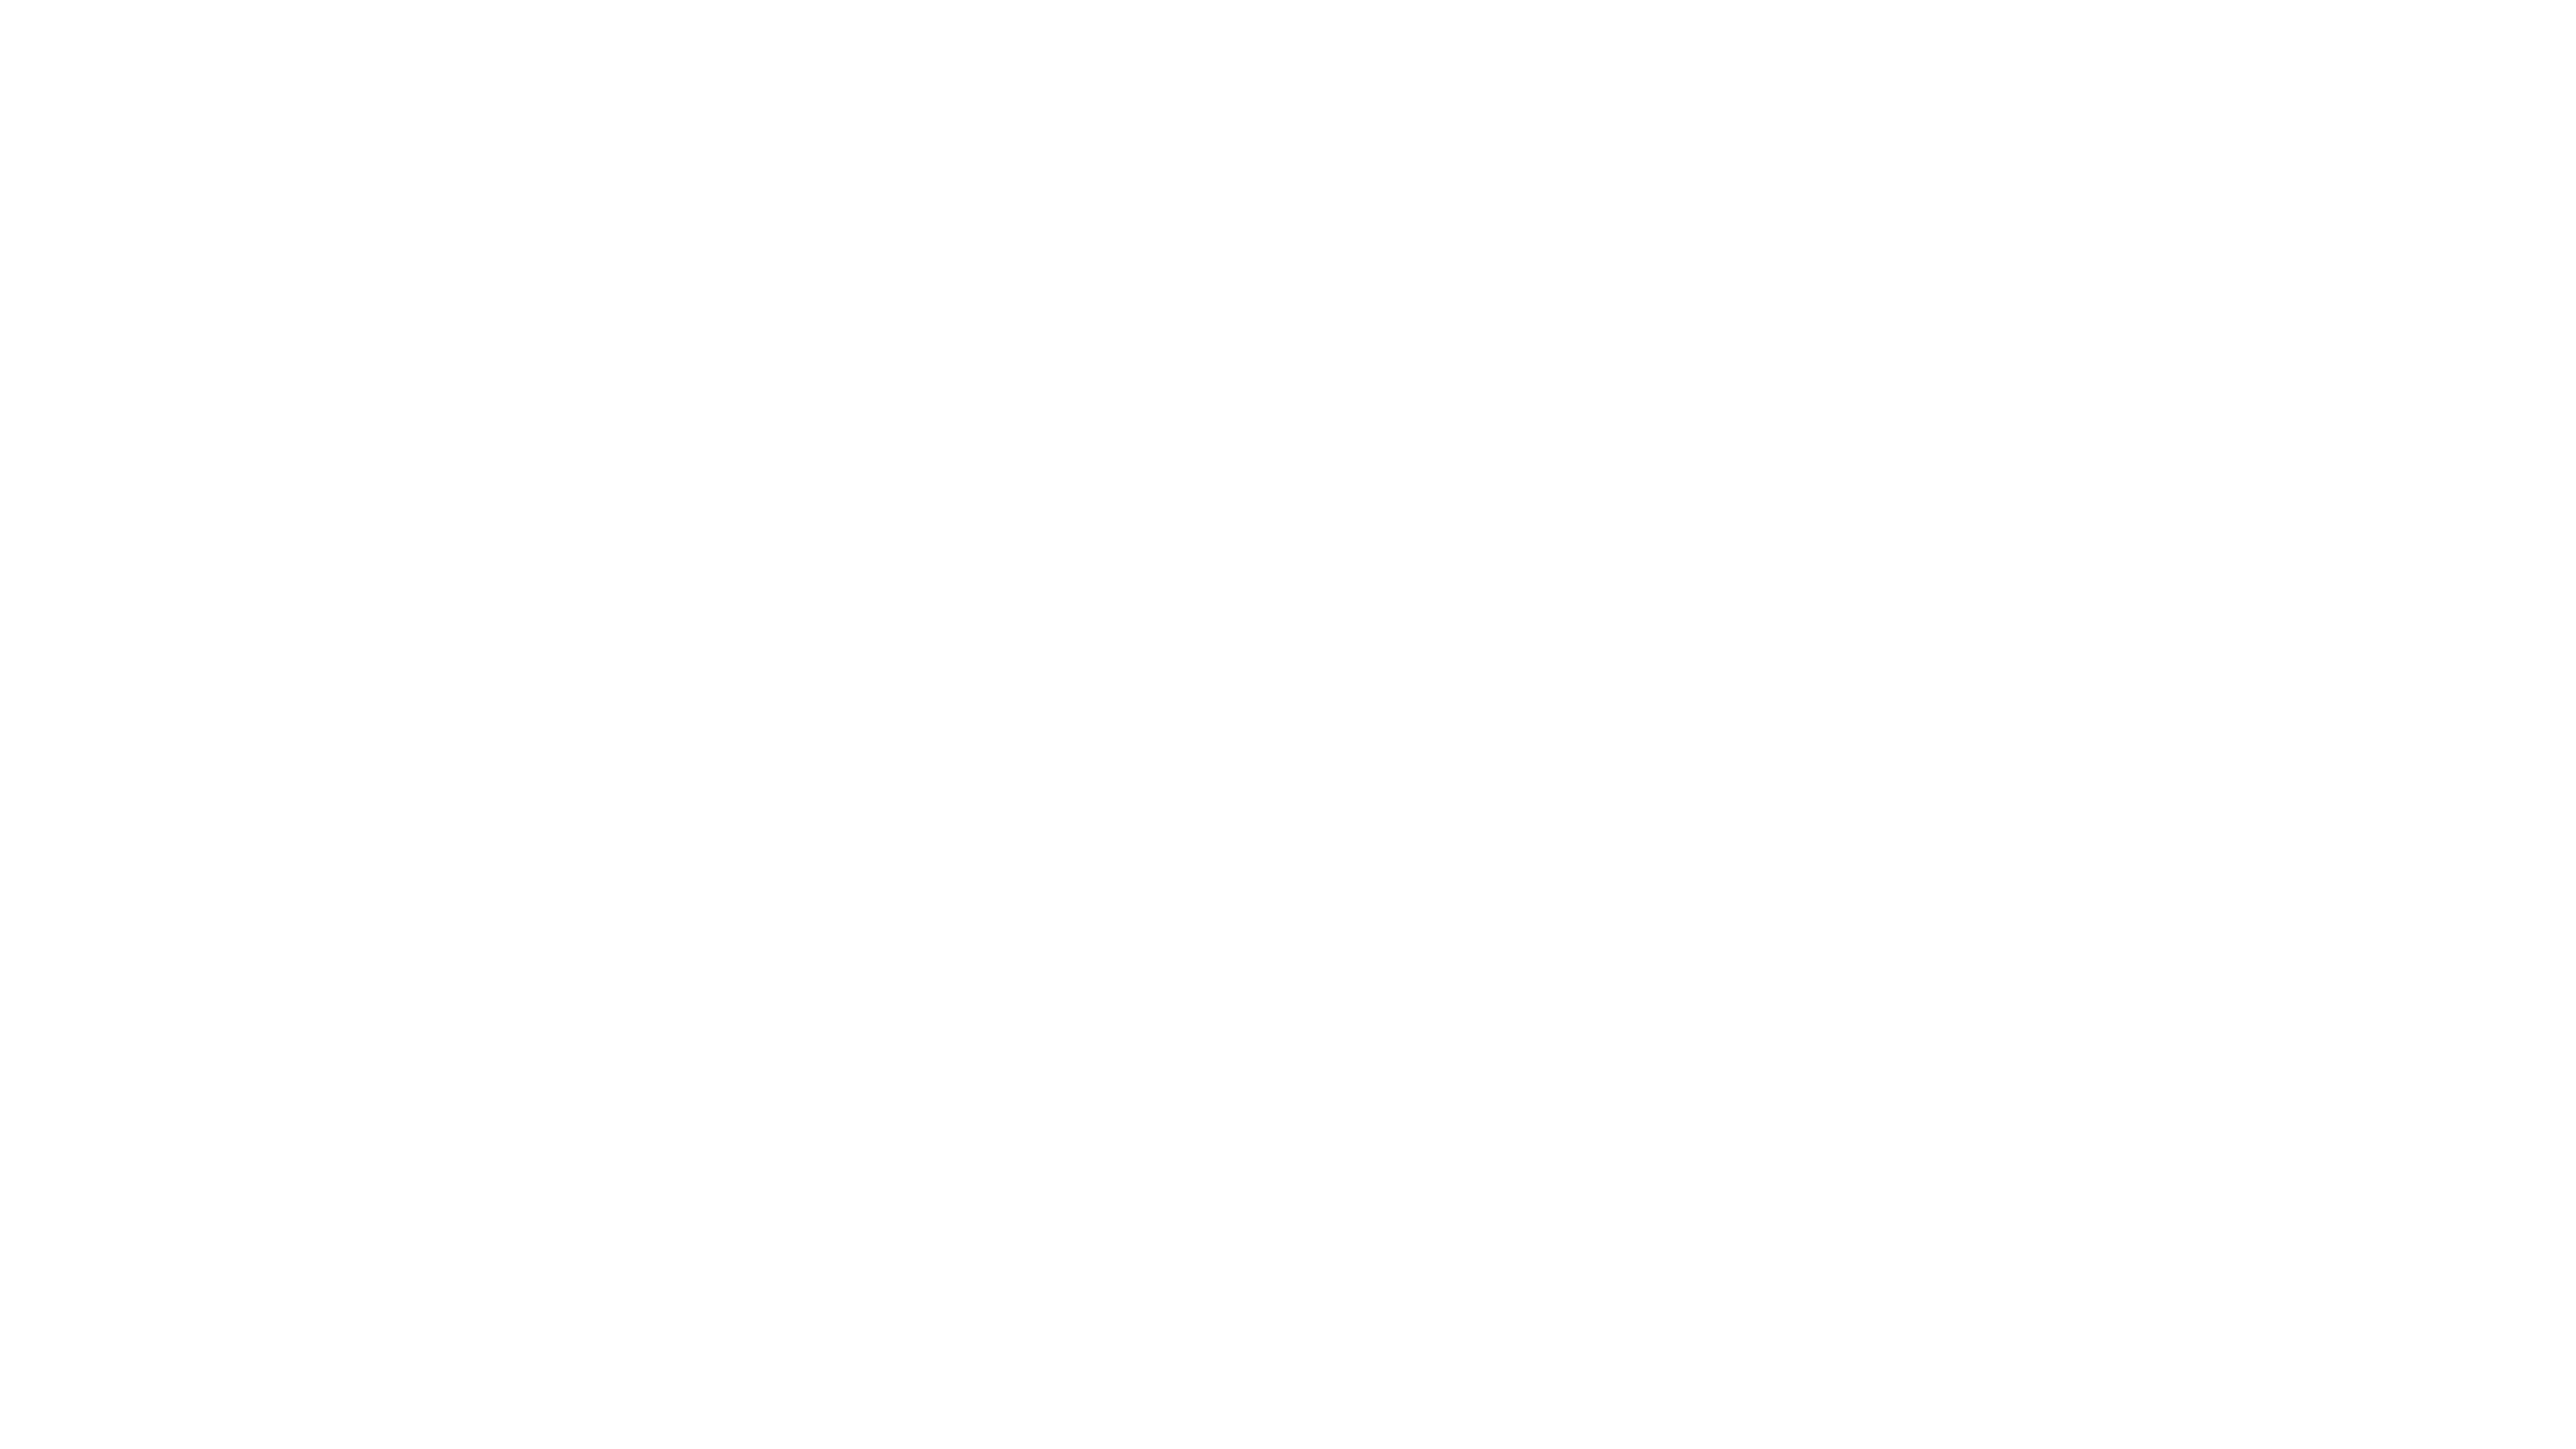

<IPython.core.display.Javascript object>


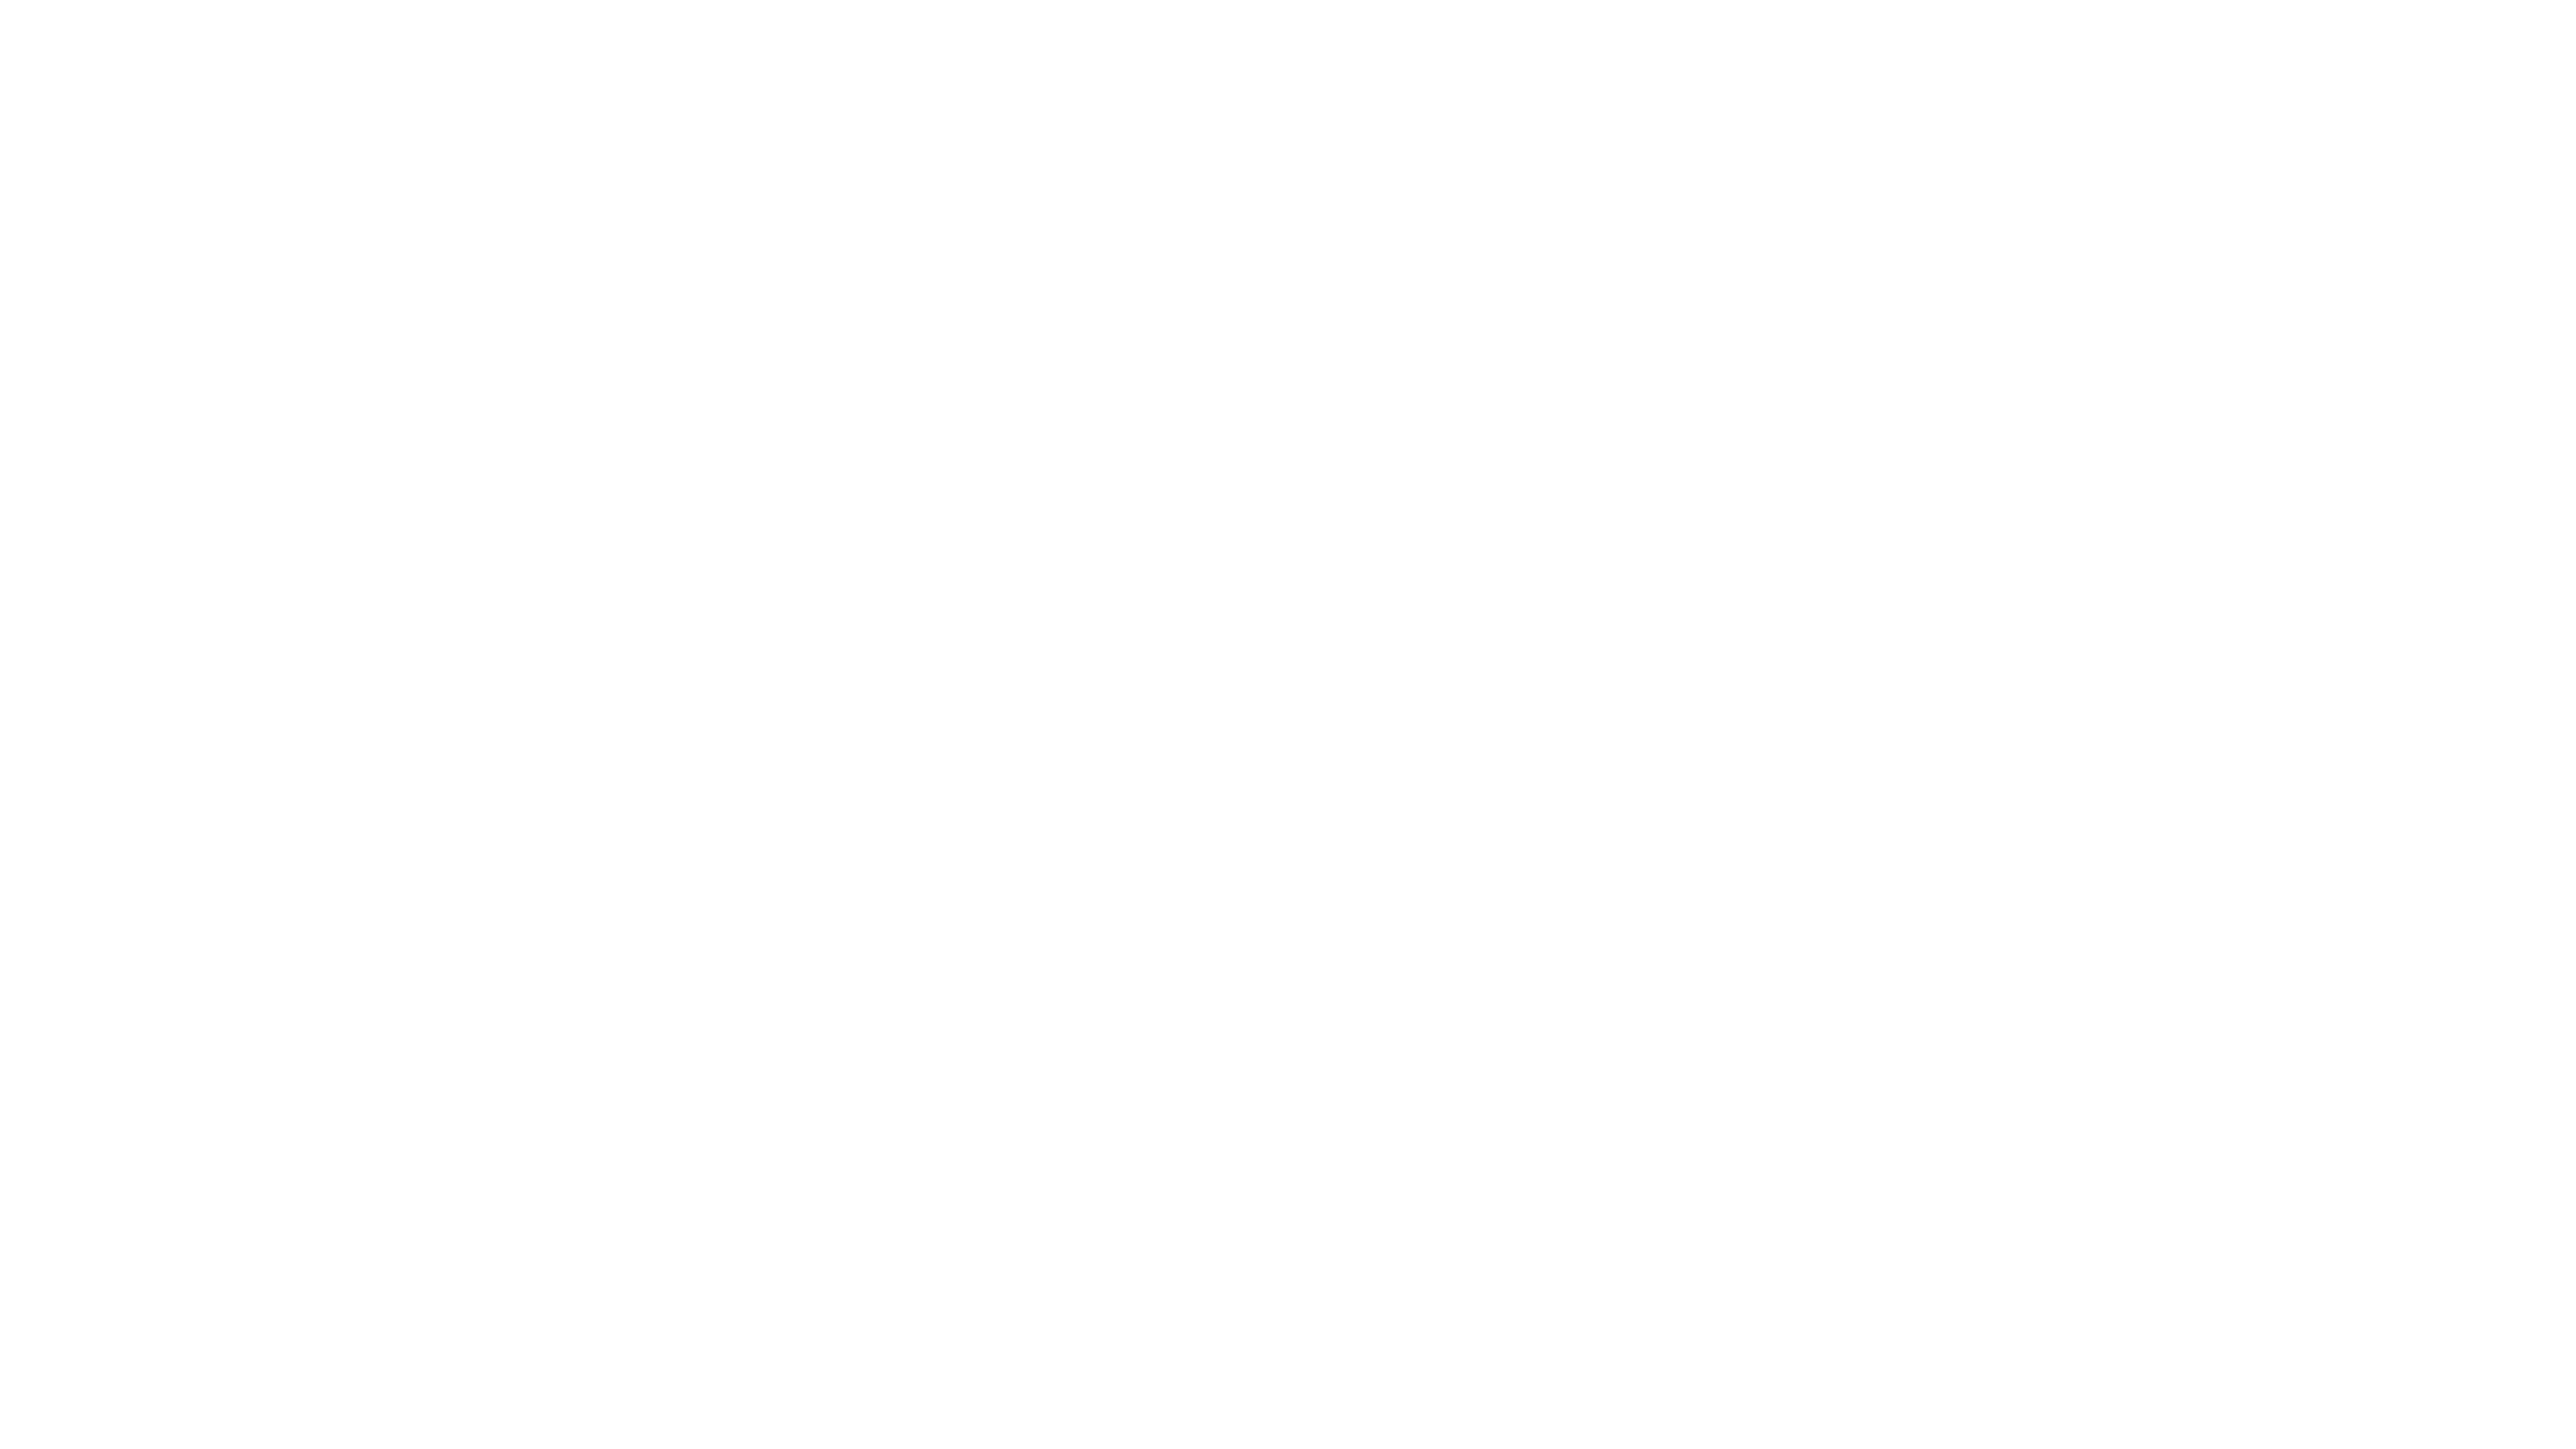

NameError: name 'mseRecons' is not defined

In [9]:
## display entire visual scene tiled by reconstructions for each error metric
plt.figure()
plt.imshow(imgData.origImg,cmap='bone',vmax=.5,vmin=-.5)
plt.axis('off')
plt.title('Original Visual Scene, Contrast = %f'%contrast(imgData.origImg,cmode))
plt.savefig('OrigVisScene.jpg',bbox_inches='tight')
plt.show()

plt.figure()
plt.imshow(mseRecons,cmap='bone',vmax=.5,vmin=-.5)
plt.axis('off')
plt.title('MSE-Optimal Reconstructed Visual Scene, Contrast = %f'%contrast(mseRecons,cmode))
plt.savefig('MSEVisScene.jpg',bbox_inches='tight')

plt.figure()
plt.imshow(wmsRecons,cmap='bone',vmax=.5,vmin=-.5)
plt.axis('off')
plt.title('wMSE-Optimal Reconstructed Visual Scene, Contrast = %f'%contrast(wmsRecons,cmode))
plt.savefig('wMSVisScene.jpg',bbox_inches='tight')

plt.figure()
plt.imshow(ssmRecons,cmap='bone',vmax=.5,vmin=-.5)
plt.axis('off')
plt.title('SSIM-Optimal Reconstructed Visual Scene, Contrast = %f'%contrast(ssmRecons,cmode))
plt.savefig('SSMVisScene.jpg',bbox_inches='tight')

<IPython.core.display.Javascript object>


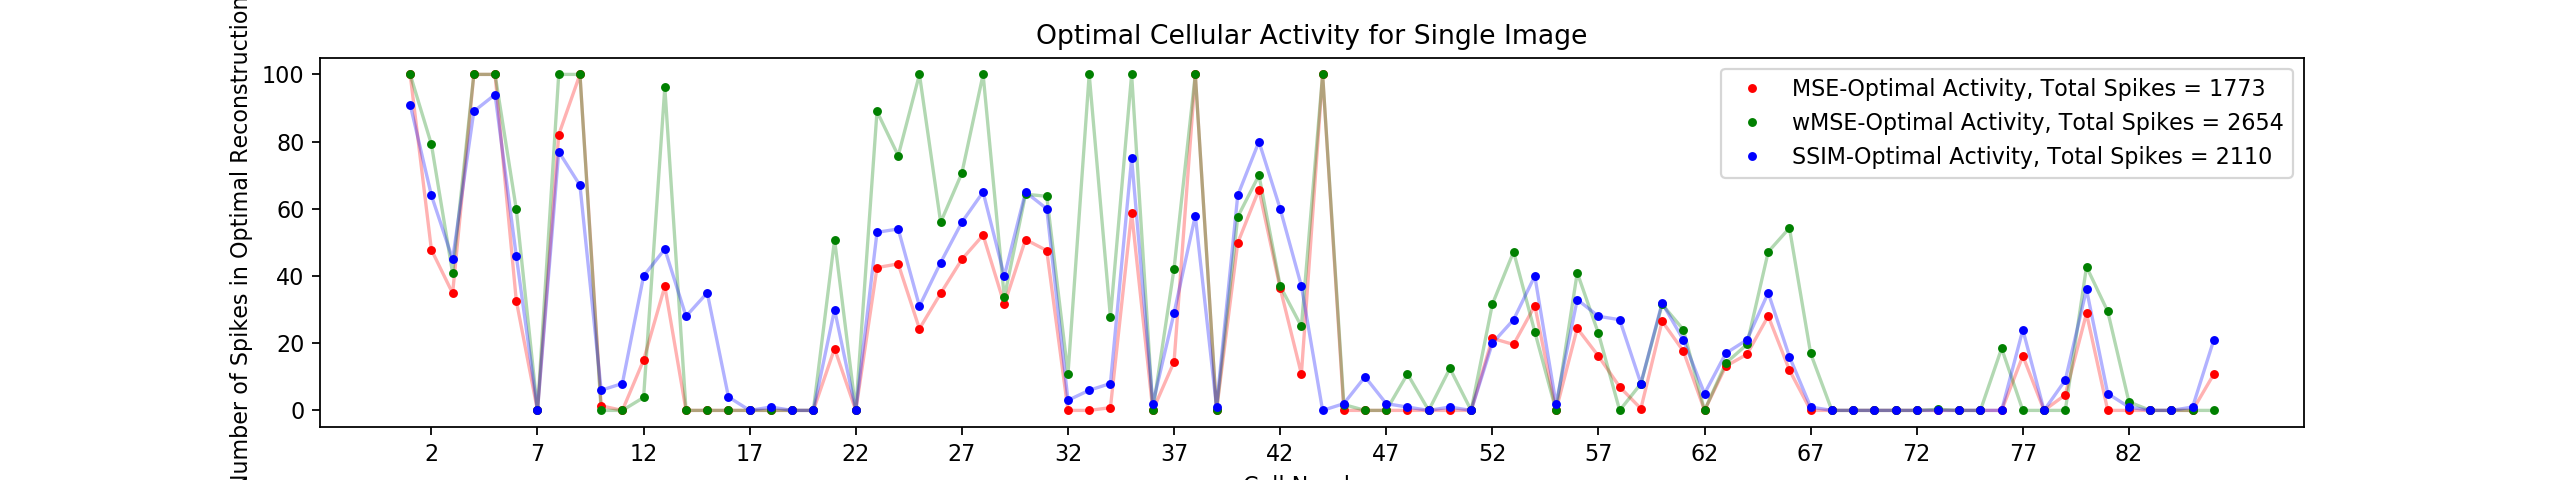

In [5]:
## single image cellular activity comparison
plt.figure(figsize= (16,3))
cellNums = np.arange(mseActs[:,imgNum].size) + 1
plt.plot(cellNums,mseActs[:,imgNum],'-',c='r',alpha=.3)
plt.plot(cellNums,wmsActs[:,imgNum],'-',c='g',alpha=.3)
plt.plot(cellNums,ssmActs[:,imgNum],'-',c='b',alpha=.3)
plt.plot(cellNums,mseActs[:,imgNum],'.',c='r',label='MSE-Optimal Activity, Total Spikes = %i'%np.sum(mseActs[:,imgNum]))
plt.plot(cellNums,wmsActs[:,imgNum],'.',c='g',label='wMSE-Optimal Activity, Total Spikes = %i'%np.sum(wmsActs[:,imgNum]))
plt.plot(cellNums,ssmActs[:,imgNum],'.',c='b',label='SSIM-Optimal Activity, Total Spikes = %i'%np.sum(ssmActs[:,imgNum]))
plt.xlabel('Cell Number')
plt.xticks(np.arange(min(cellNums), max(cellNums), 5)+1)
plt.ylabel('Number of Spikes in Optimal Reconstruction')
plt.title('Optimal Cellular Activity for Single Image')
plt.legend()
plt.savefig('SingleImageCellActComp.jpg',bbox_inches='tight')




<IPython.core.display.Javascript object>


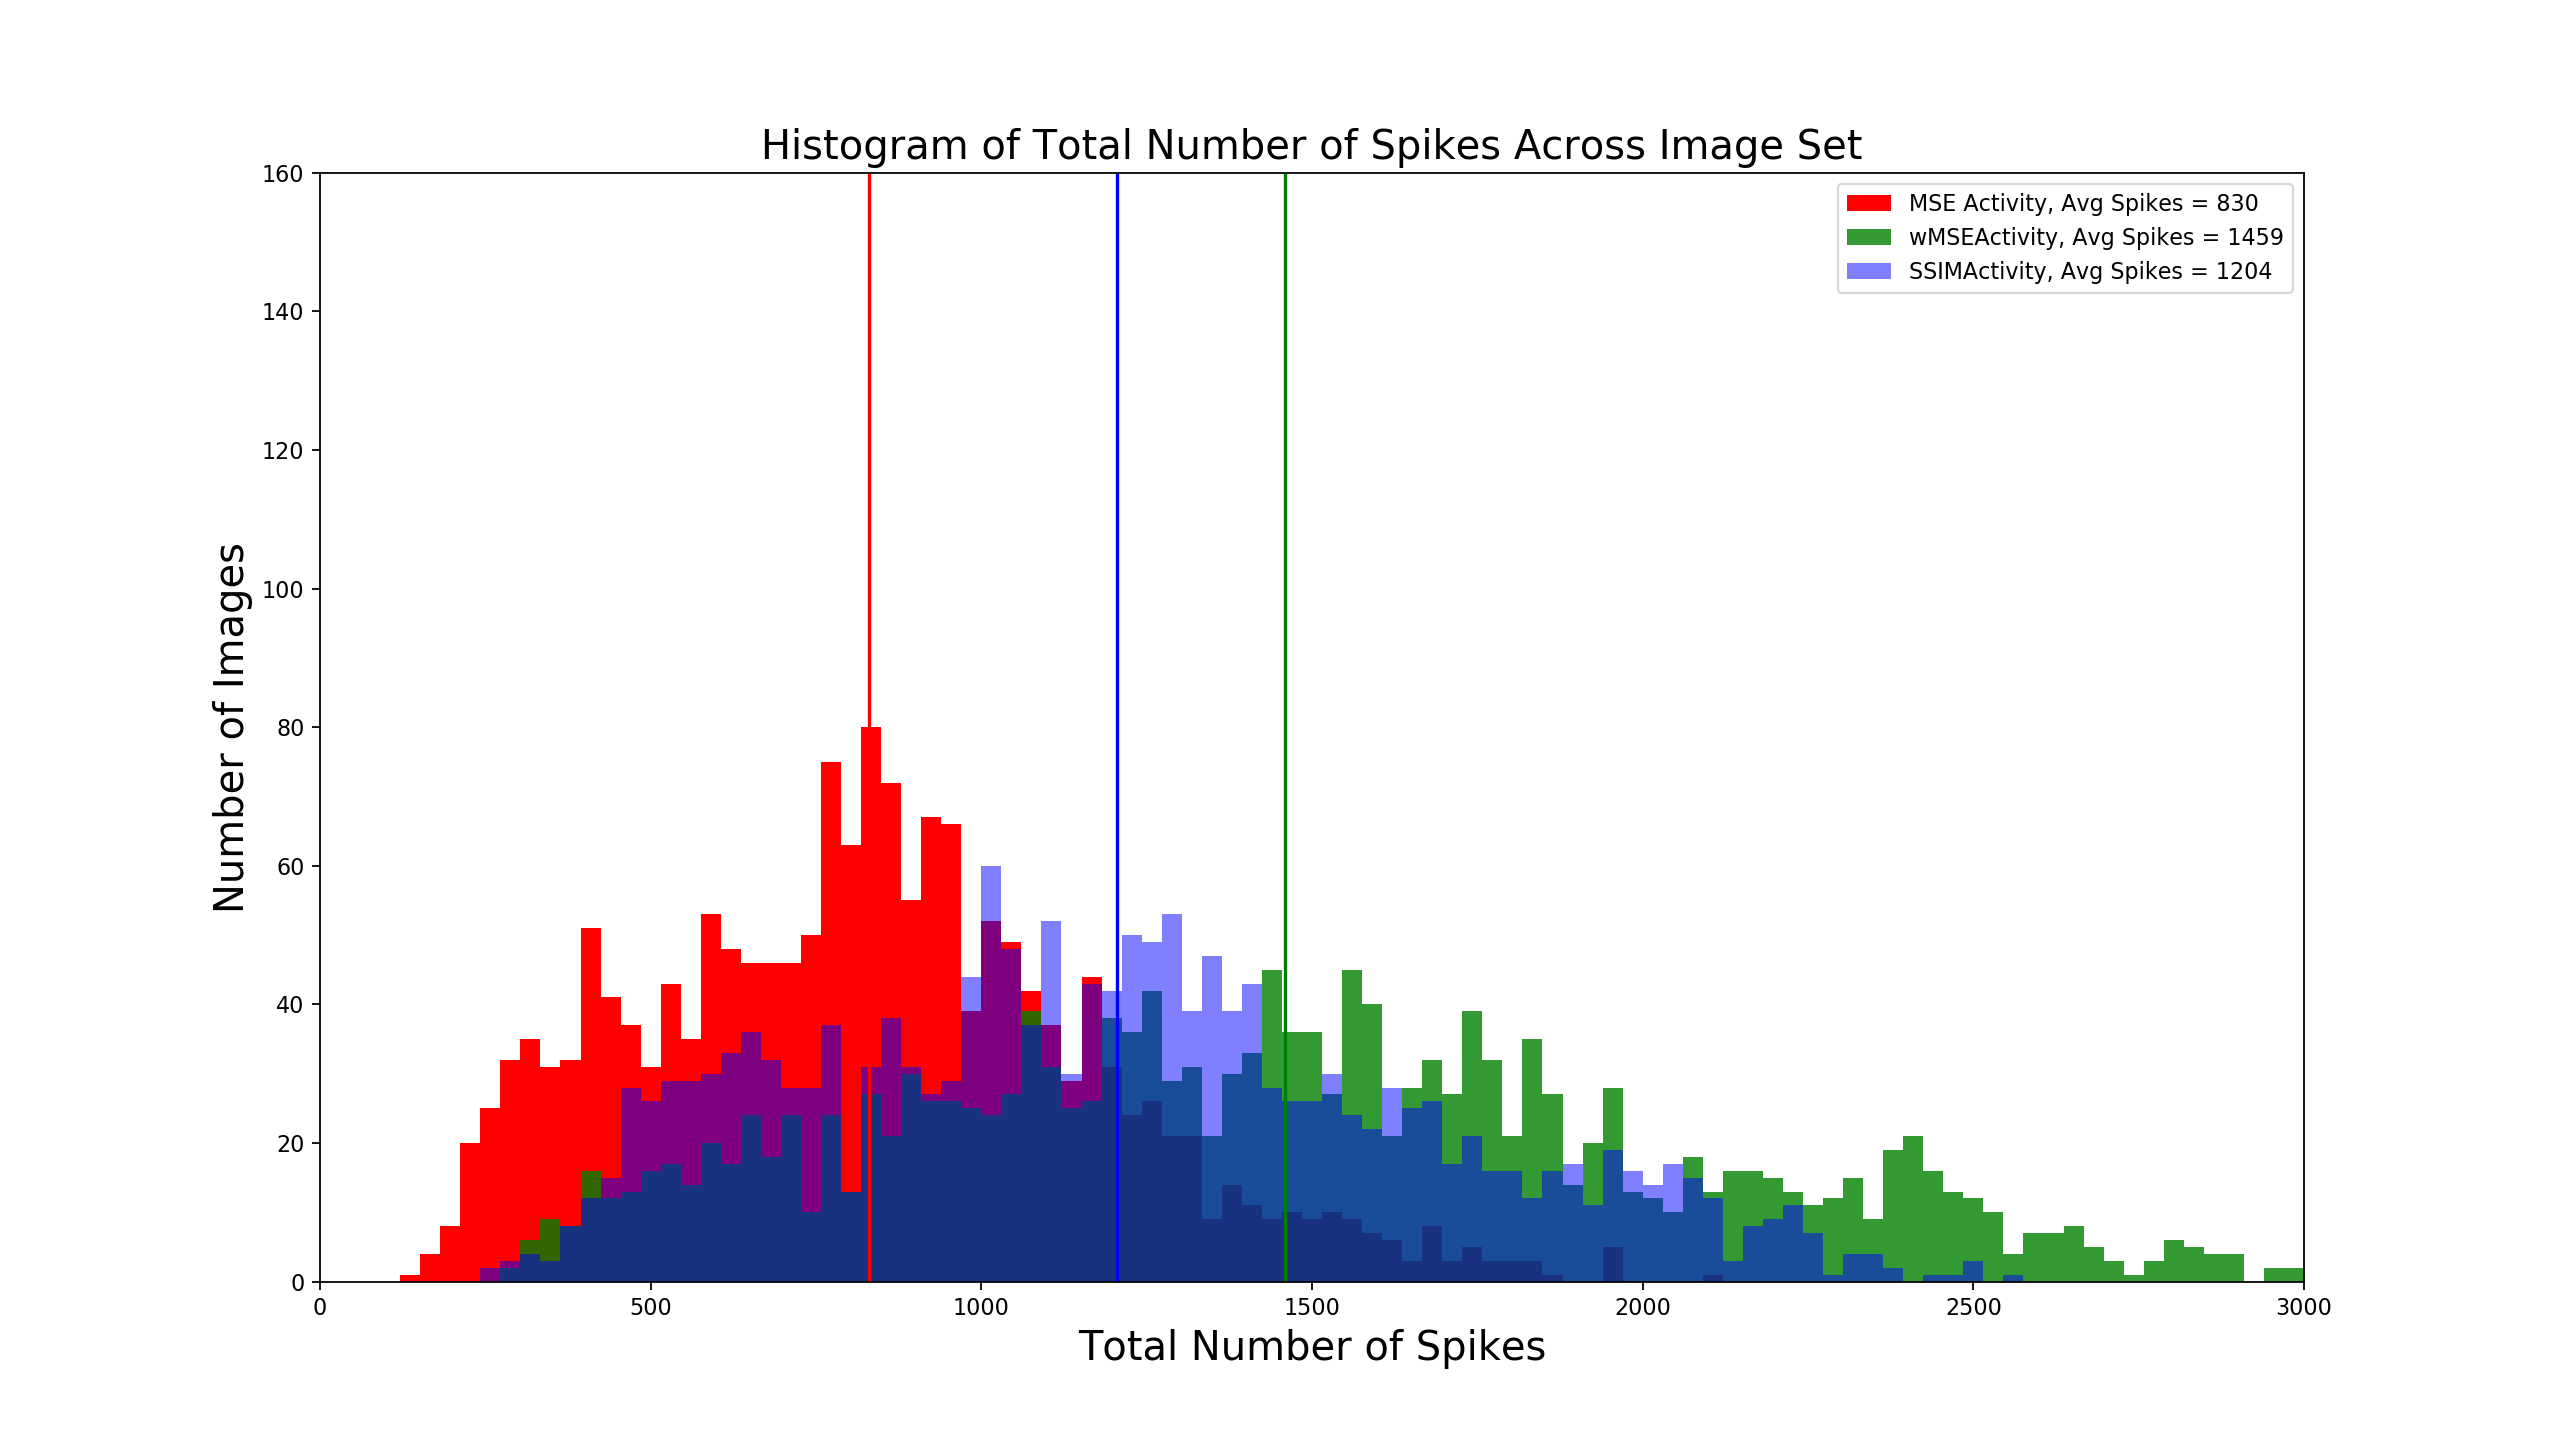

In [7]:
# cell activity  histogram

plt.figure(figsize=(16,9))
actHist(mseActs,"MSE",1)
actHist(wmsActs,"wMSE",.8)
actHist(ssmActs,"SSIM",.5)
plt.xlim([0,3000])
plt.ylim([0, 160])

plt.savefig('CellActHistogram.jpg',bbox_inches='tight')

So far these results assume no limit on the number of spikes (stimulations) permitted. To address this, I've  repeated this simulation but constrained solutions to limit the number of spikes to values logarithmically spaced between $10^0$ and $10^5$. These limits introduce distortion into the reconstructed images. To quantify these distortions, I've measured the relative error of the MSE, wMSE, and SSIM reconstructed images to the given reference image. The relative error is defined as Error(A,B) / Error(A, 0),  so for example for MSE,  relative error_MSE = $||A-B||^2 $ / $||A||^2$. This relative error is a unitless measure that is nonnegative and zero when the two images compared are equal. Each curve is averaged over the set of ~1,700 images and the vertical bars represent standard error of the mean. 







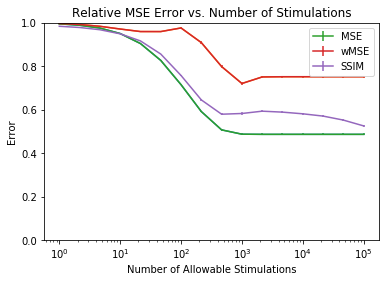

In [3]:
plt.figure()
plotStimCompar(imgData, stimSweepData, "MSE", psychParams, (20,20))
plt.savefig("RelativeMSEConv.jpg",bbox_inches='tight')

# plt.figure()
# plotStimCompar(imgData, stimSweepData, "wMS", psychParams, (20,20))
# plt.savefig("RelativewMSConv.jpg",bbox_inches='tight')

# plt.figure()
# plotStimCompar(imgData, stimSweepData, "SSIM", psychParams, (20,20))
# plt.savefig("RelativeSSMConv.jpg",bbox_inches='tight')


We see that the metrics tend to diverge from one another at around numStims ~ 100. Plotting the reconstructed image at numStims = 100 we have: 

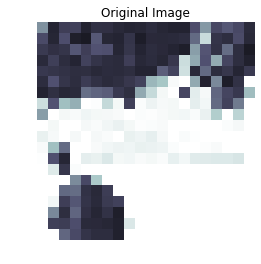

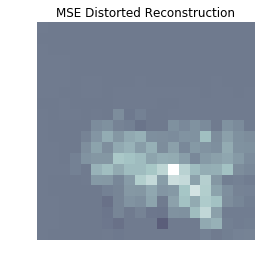

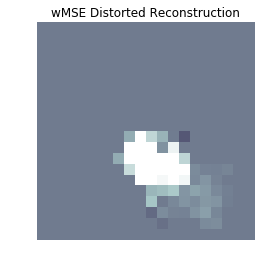

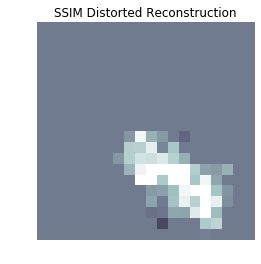

In [26]:
## single image comparison for numStims ~ 500

Tidx = 6
imgNum = 980

origIm = np.reshape(imgData.imgSet[:,imgNum],pixelDims,order='F')
mseRec = np.reshape(stimSweepData.mseImgSet[Tidx,:,imgNum],pixelDims,order='F')
wmsRec = np.reshape(stimSweepData.wmsImgSet[Tidx,:,imgNum],pixelDims,order='F')
ssmRec = np.reshape(stimSweepData.ssmImgSet[Tidx,:,imgNum],pixelDims,order='F')

plt.figure()
plt.imshow(origIm,cmap='bone',vmax=.5,vmin=-.5)
plt.axis('off')
plt.title("Original Image")
plt.savefig('OriginalDistorted.jpg',bbox_inches='tight')
plt.show()


plt.figure()
plt.imshow(mseRec,cmap='bone',vmax=.5,vmin=-.5)
plt.axis('off')
plt.title("MSE Distorted Reconstruction")
plt.savefig('MSEReconsDistorted.jpg',bbox_inches='tight')


plt.figure()
plt.imshow(wmsRec,cmap='bone',vmax=.5,vmin=-.5)
plt.axis('off')
plt.title("wMSE Distorted Reconstruction")
plt.savefig('wMSReconsDistorted.jpg',bbox_inches='tight')


plt.figure()
plt.imshow(ssmRec,cmap='bone',vmax=.5,vmin=-.5)
plt.axis('off')
plt.title("SSIM Distorted Reconstruction")
plt.savefig('SSMReconsDistorted.jpg',bbox_inches='tight')



Once again, we see  differences that become clearer over the larger visual scene: 

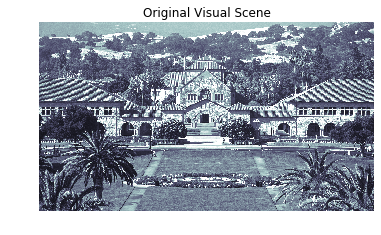

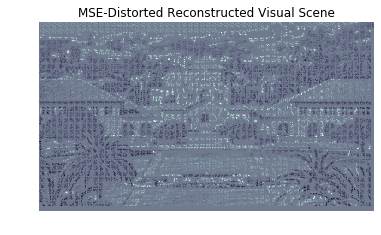

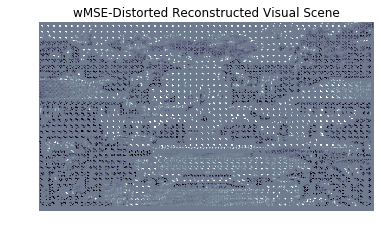

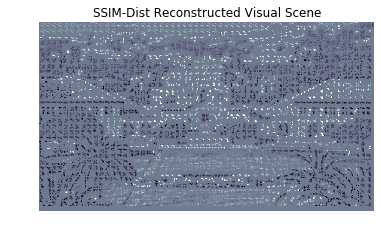

In [27]:
## display entire distorted visual scene tiled by reconstructions for each error metric
plt.figure()
plt.imshow(imgData.origImg,cmap='bone',vmax=.5,vmin=-.5)
plt.axis('off')
plt.title('Original Visual Scene')
plt.savefig('OrigVisSceneDist.jpg',bbox_inches='tight')
plt.show()

plt.figure()
plt.imshow(stimSweepData.mseRecSet[Tidx],cmap='bone',vmax=.5,vmin=-.5)
plt.axis('off')
plt.title('MSE-Distorted Reconstructed Visual Scene')
plt.savefig('MSEVisSceneDist.jpg',bbox_inches='tight')

plt.figure()
plt.imshow(stimSweepData.wmsRecSet[Tidx],cmap='bone',vmax=.5,vmin=-.5)
plt.axis('off')
plt.title('wMSE-Distorted Reconstructed Visual Scene')
plt.savefig('wMSVisSceneDist.jpg',bbox_inches='tight')

plt.figure()
plt.imshow(stimSweepData.ssmRecSet[Tidx],cmap='bone',vmax=.5,vmin=-.5)
plt.axis('off')
plt.title('SSIM-Dist Reconstructed Visual Scene')
plt.savefig('SSMVisSceneDist.jpg',bbox_inches='tight')

<IPython.core.display.Javascript object>


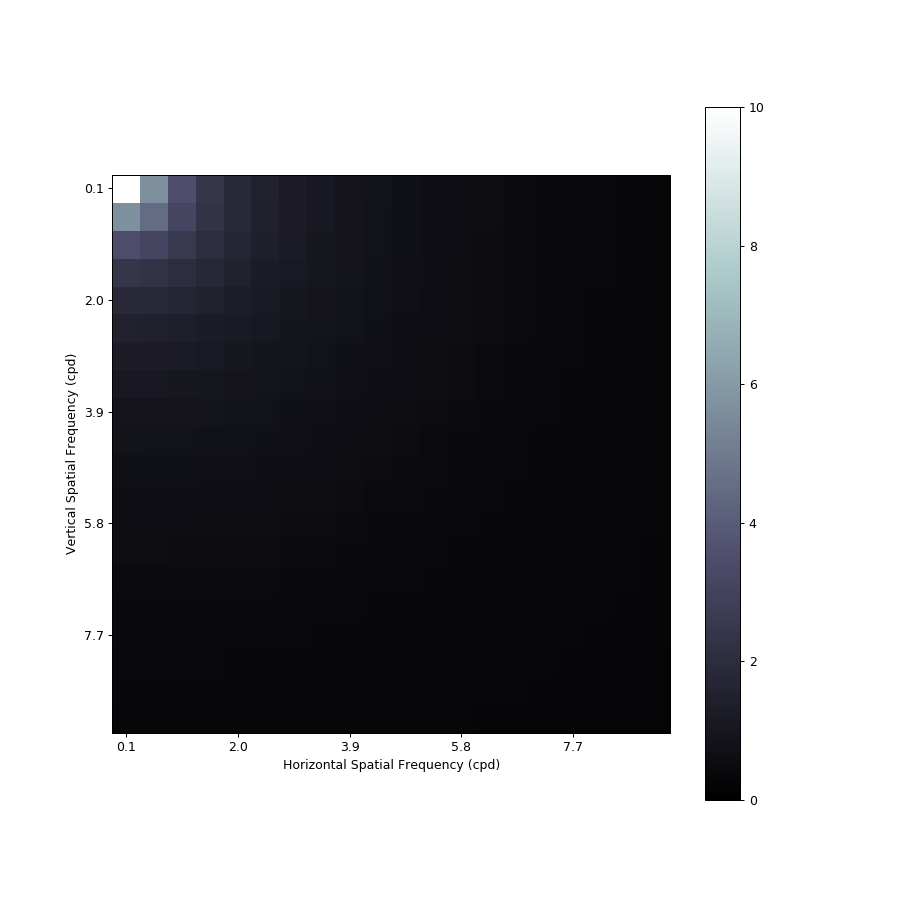

In [38]:
XO = psychParams["XO"]

psychParams["e"] = 20
N  =  int(imgData.origImg.shape[0]/imgData.sDims[0]) # number of selection blocks (number of samples of DC terms of each subImage)
offset = (1/2) * (N / XO)
Wp = csf(psychParams,pixelDims,offset=offset) #offset frequency b


sfRes = 1/20
ppd = 20/psychParams["elecXO"]
fs = (sfRes * ppd *(np.arange(20) )) + offset
fs = np.round(fs,1)
ticks = np.arange(0,20,4)
labels = fs[np.arange(0,20,4)]
      
plt.figure(figsize=(10,10))
plt.imshow(Wp,cmap='bone',vmax=10,vmin=0)
plt.xticks(ticks,labels)
plt.yticks(ticks,labels)
plt.xlabel('Horizontal Spatial Frequency (cpd)')
plt.ylabel('Vertical Spatial Frequency (cpd)')
plt.colorbar()
plt.show()

<IPython.core.display.Javascript object>


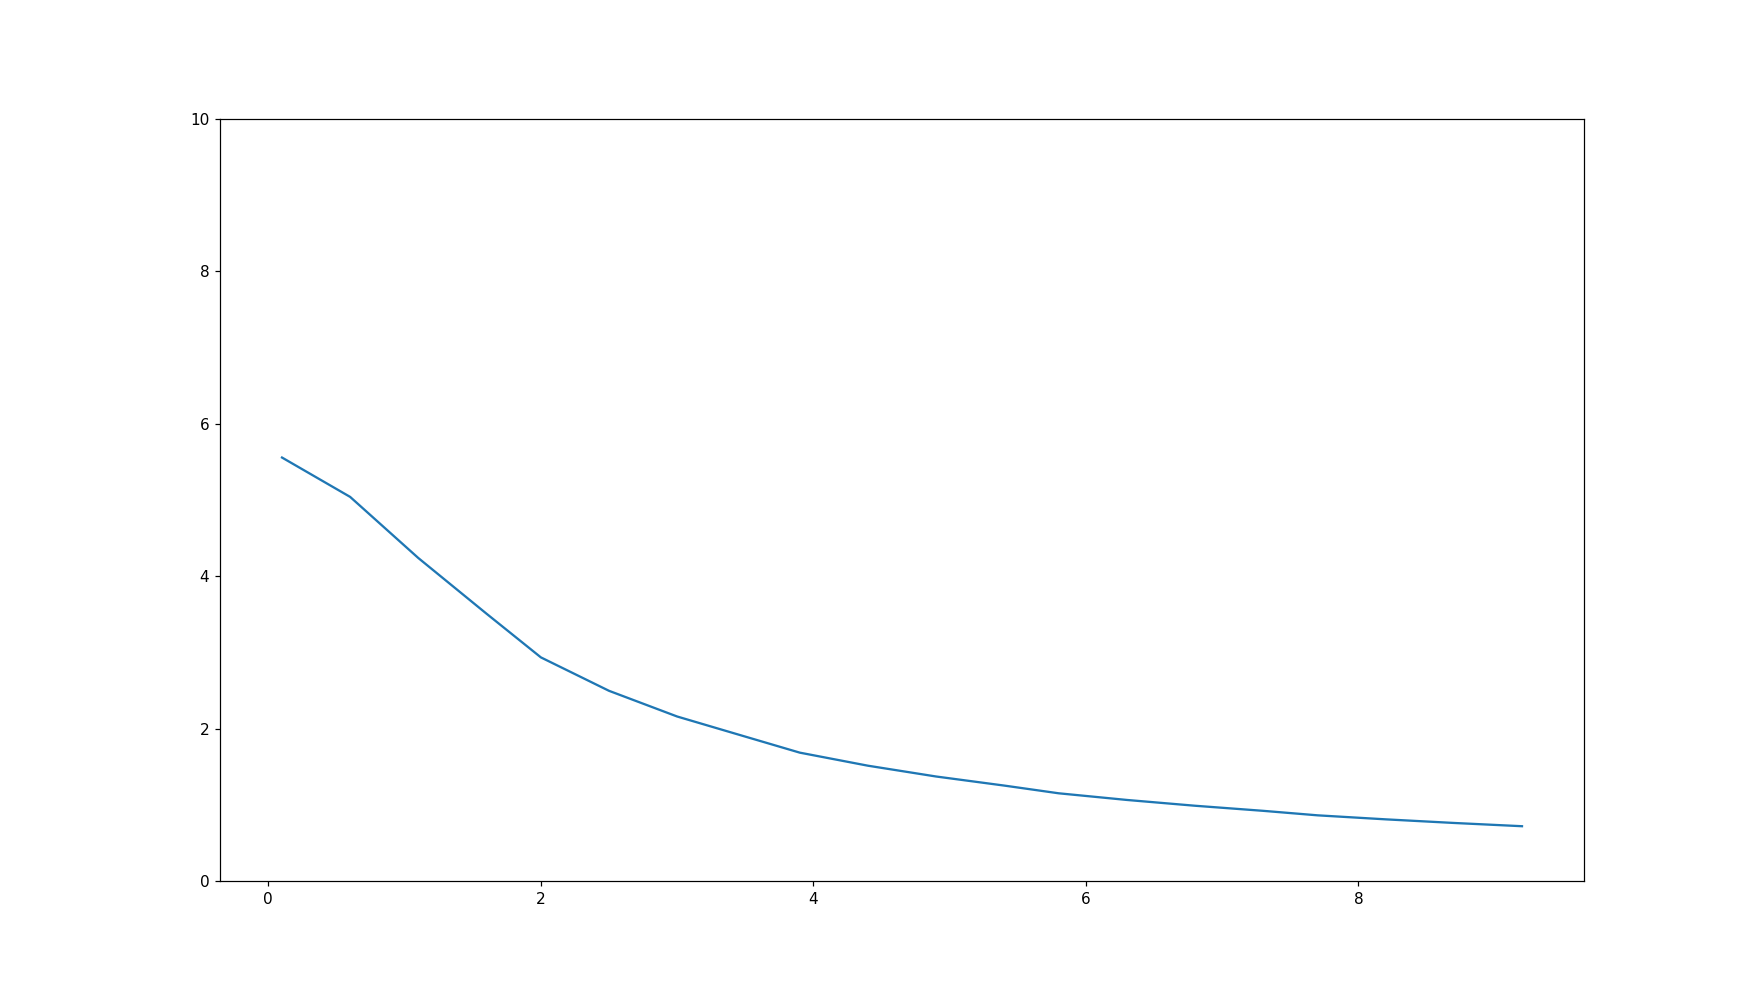

In [29]:
plt.figure()
plt.plot(fs,Wp[0,:])
plt.ylim([0, 10])
plt.show()


<IPython.core.display.Javascript object>


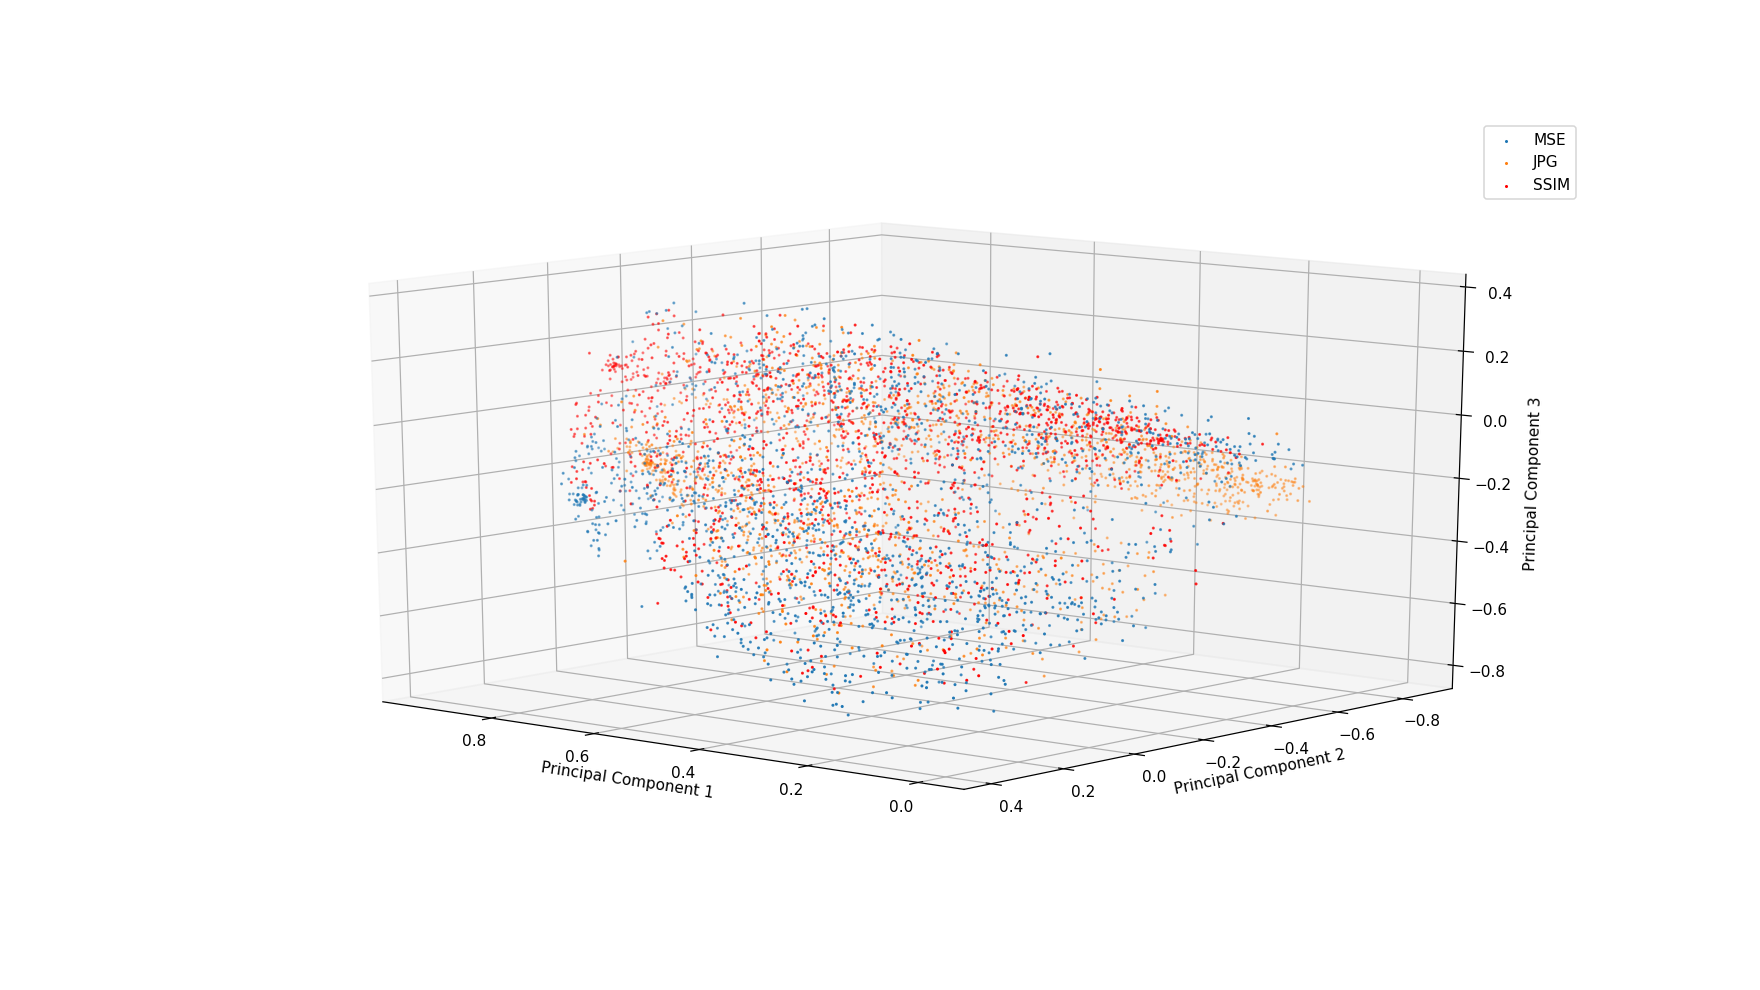

<IPython.core.display.Javascript object>


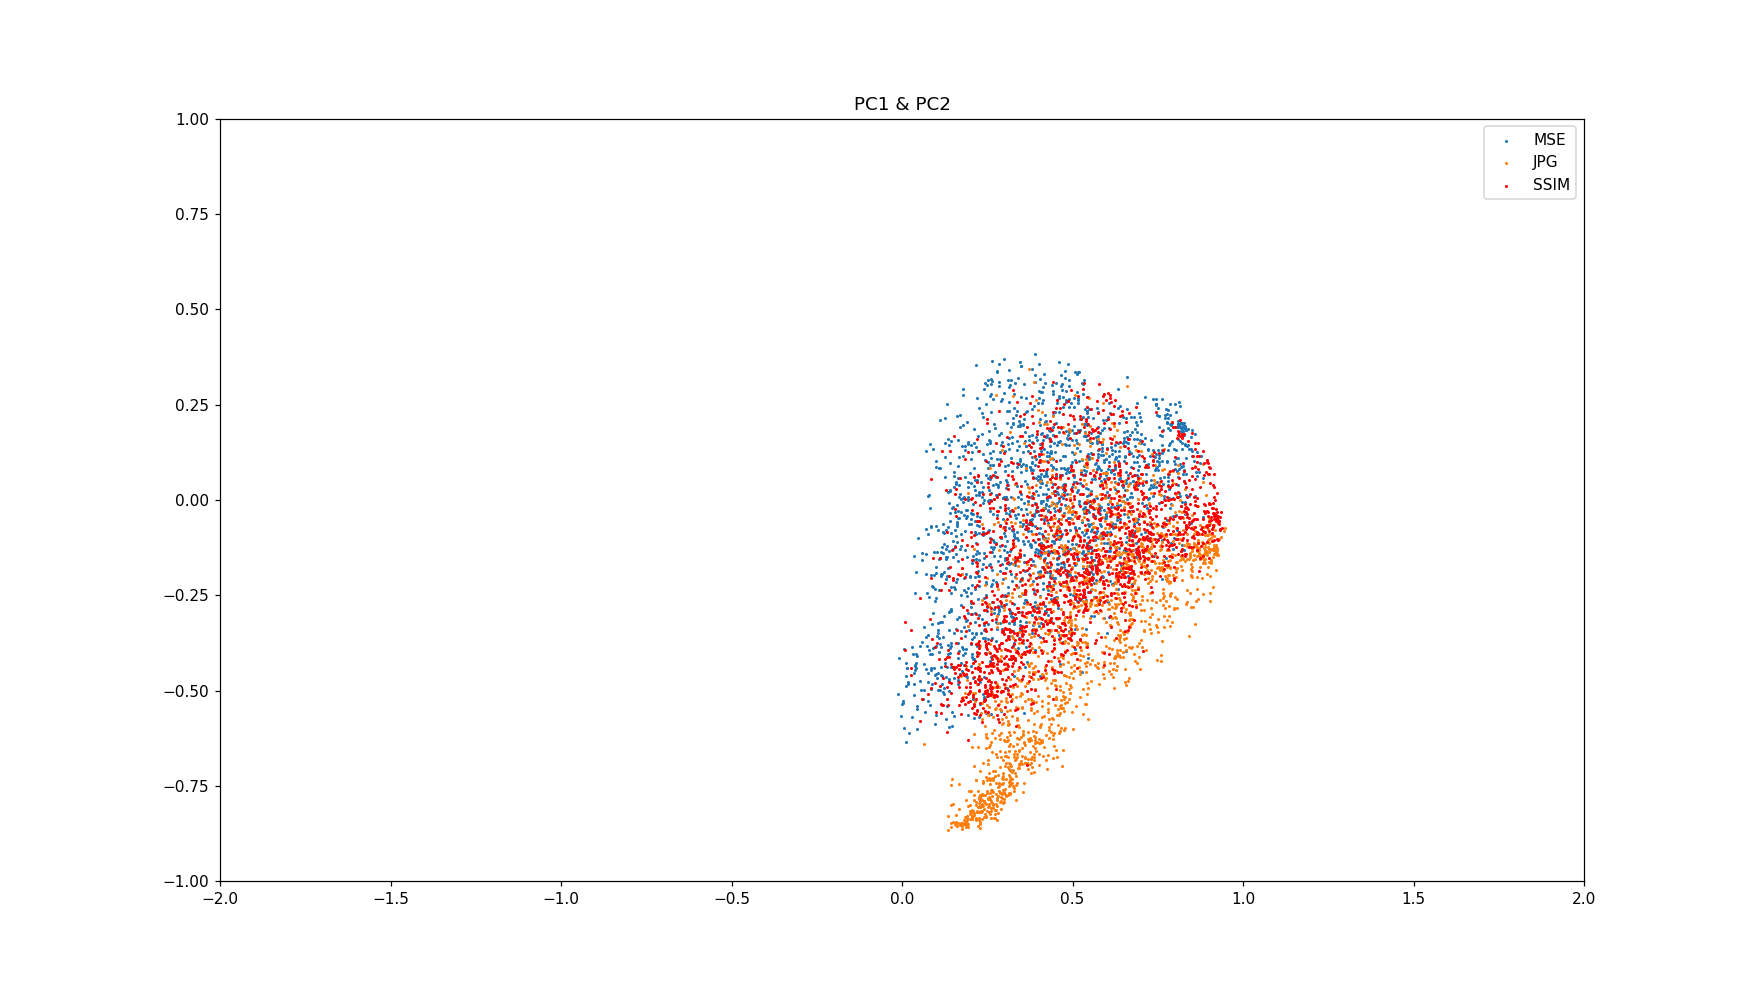

<IPython.core.display.Javascript object>


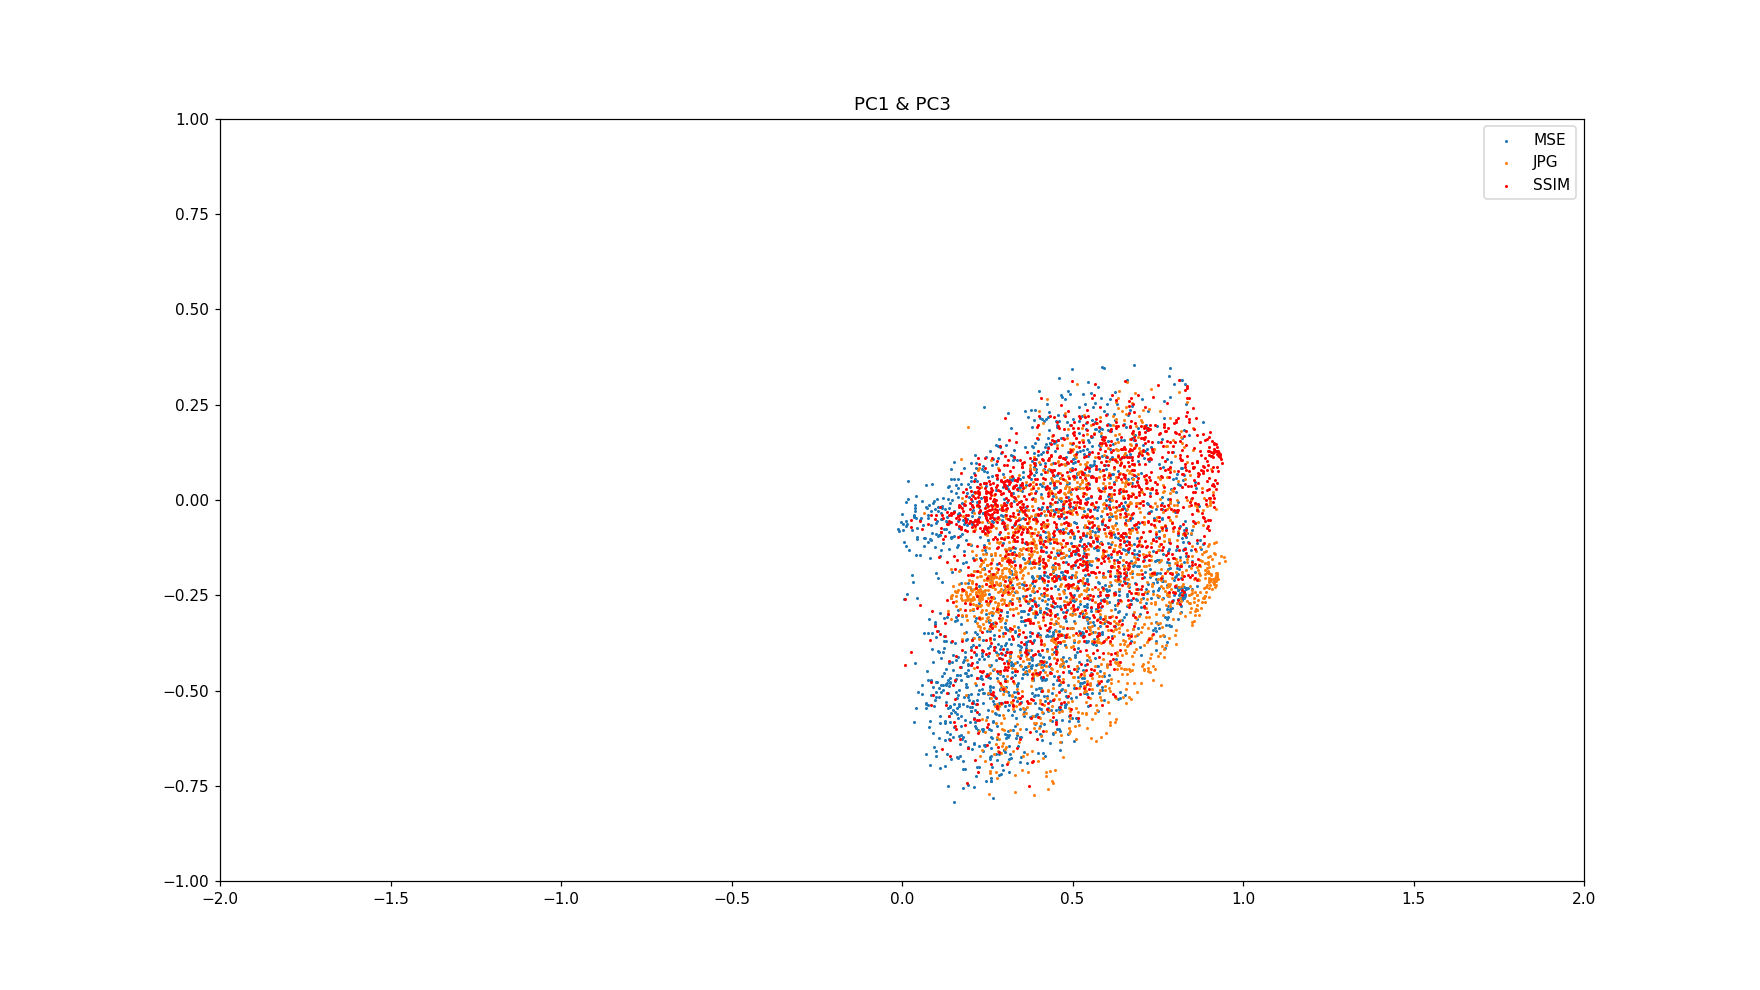

<IPython.core.display.Javascript object>


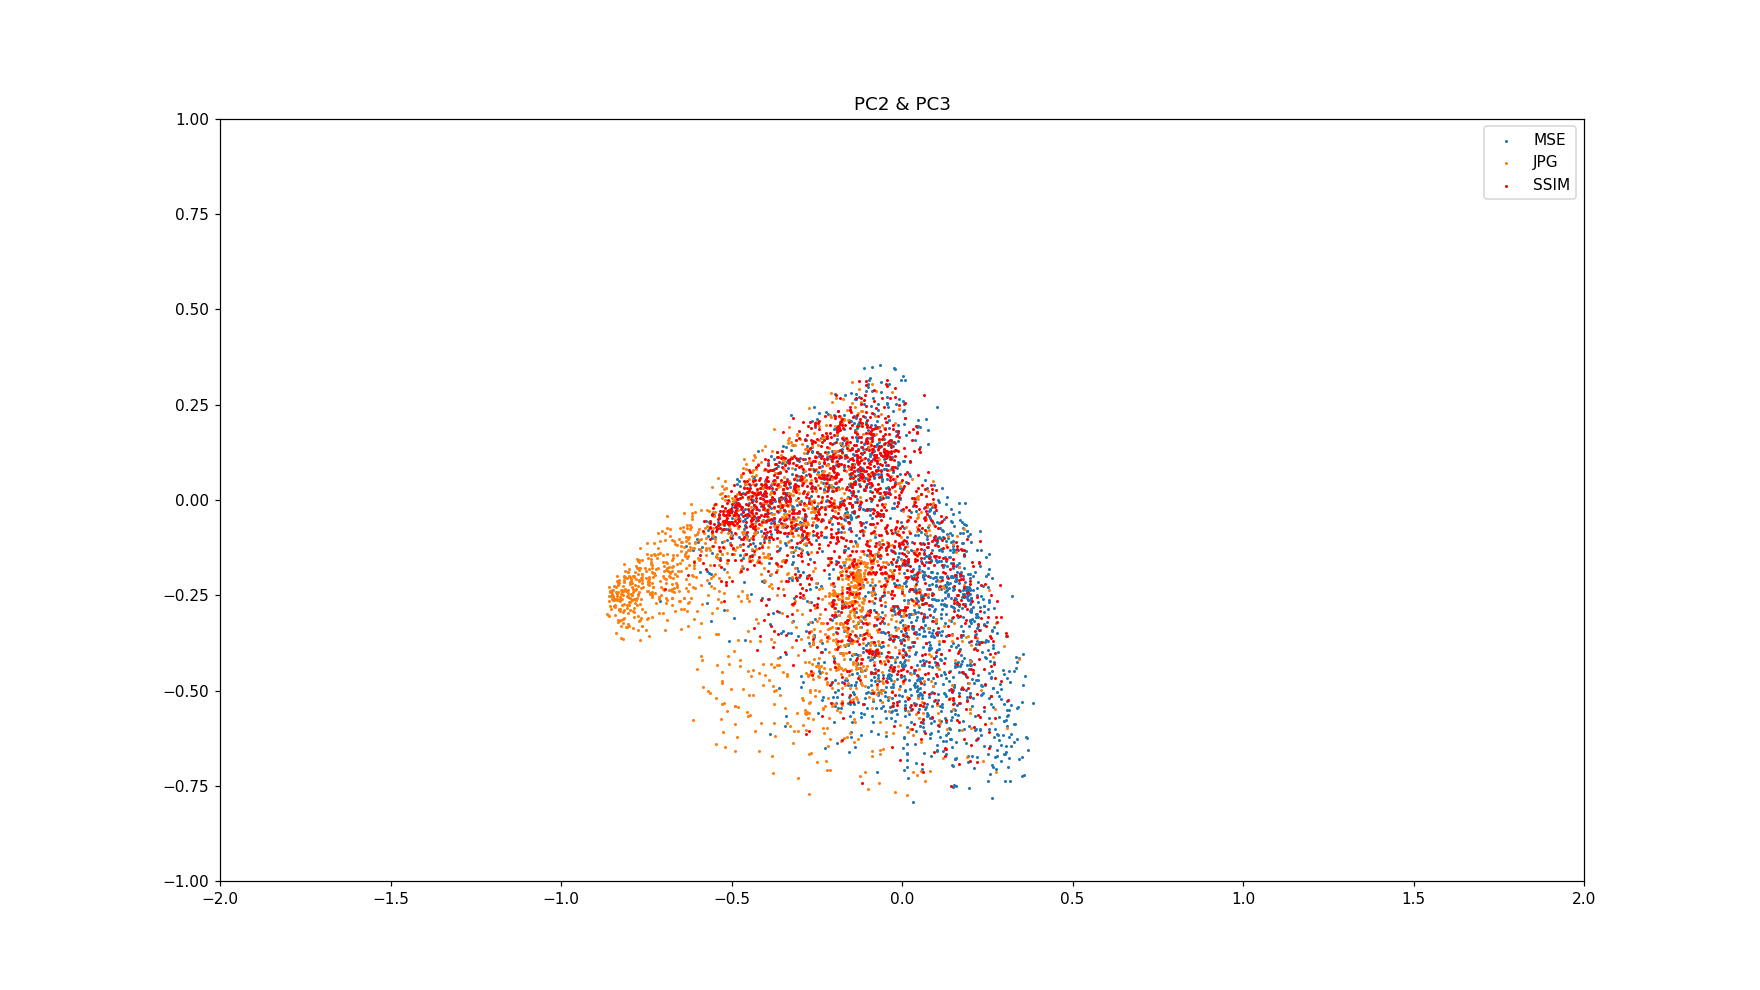

(array([7277.72157912, 3781.6779556 , 2154.89395039, 1936.67246476,
        1326.95533626, 1212.13578351, 1132.2448786 ,  969.8946069 ,
         855.97101545,  783.51668691,  673.48030751,  640.92563634,
         582.18779472,  548.30476971,  454.37318308,  443.99063003,
         419.06608906,  379.24188456,  351.25498036,  330.77744331,
         314.0053459 ,  291.60155879,  275.24978111,  281.37578473,
         248.96270517,  232.85245718,  217.67090981,  212.7022258 ,
         204.86882338,  184.75482008,  175.5580646 ,  161.08421201,
         161.70119954,  155.78167593,  150.8885511 ,  142.9740788 ,
         140.18991935,  132.46169567,  126.48136913,  118.21494422,
         113.68213842,  109.45921388,  108.00026415,  102.91928394,
         104.38396202,   99.60042149,   91.61522273,   86.61999251,
          84.75149614,   82.72017397,   78.12967722,   75.87040608,
          74.35616008,   71.23742006,   67.5752424 ,   10.34467651,
          11.29983283,   61.96570912,   58.74290

In [34]:
dispImgSetCorr(eLocs,eMap,imgData.imgSet,mseActs,wmsActs, ssmActs)